In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Loading Data files
df1 = pd.read_excel('staff utlz latest 16-17_masked.xlsx', header = 1)
df2 = pd.read_excel('staff utlz latest 17-18_masked.xlsx', header = 1)

# Termination File
dft = pd.read_excel("Terminations 15-18.xlsx")

In [157]:
df1.head(3)

EmployeeNo ProfitCenter       EmployeeName EmployeePosition  \
0           1       PC - 1   Rochette Jilleen          Level 2   
1           2       PC - 2     Daryl Natalina          Level 2   
2           3       PC - 2  Annnora Gabrielle          Level 2   

  EmployeeLocation           PeopleGroup EmployeeCategory    Supervisorname  \
0       Location 3  Client Service Staff        Level 1/2  Idalina Lauraine   
1       Location 7  Client Service Staff        Level 1/2  Idalina Lauraine   
2       Location 7  Client Service Staff        Level 1/2  Idalina Lauraine   

    JoinDate CurrentStatus TerminationDate TotalHours TotalAvailableHours  \
0 2000-09-30        Active               -        168                 160   
1 1999-05-31        Active               -        168                 152   
2 2001-01-31        Active               -        168                 144   

  WorkHours LeaveHours TrainingHours BDHours NCHours Utilization%  \
0        55          8             0     102       0      0.34375   
1        54          8             8      44      74     0.355263   
2        59         16             8      43      60     0.409722   

  TotalHours.1 TotalAvailableHours.1 WorkHours.1 LeaveHours.1 TrainingHours.1  \
0          176                   168          32            8               0   
1          176                   152          24           24               0   
2          176                   184        52.5           -8               0   

  BDHours.1 NCHours.1 Utilization%.1 TotalHours.2 TotalAvailableHours.2  \
0       168         8       0.190476          176                   152   
1        65        67       0.157895          176                   172   
2      69.5        62       0.285326          176                   168   

  WorkHours.2 LeaveHours.2 TrainingHours.2 BDHours.2 NCHours.2 Utilization%.2  \
0          12           24               0        44         0       0.078947   
1          86            4               0        47        50            0.5   
2          43            8               0        61        64       0.255952   

  TotalHours.3 TotalAvailableHours.3 WorkHours.3 LeaveHours.3 TrainingHours.3  \
0          168                   134          69           32               2   
1          168                   144          27            8              16   
2          168                   167          85            0               1   

  BDHours.3 NCHours.3 Utilization%.3 TotalHours.4 TotalAvailableHours.4  \
0       153        24       0.514925          184                   168   
1        63        79         0.1875          184                   168   
2      30.5      61.5       0.508982          184                   160   

  WorkHours.4 LeaveHours.4 TrainingHours.4 BDHours.4 NCHours.4 Utilization%.4  \
0          20           16               0        84         0       0.119048   
1          34           16               0        68        70       0.202381   
2         119           24               0        34        34        0.74375   

  TotalHours.5 TotalAvailableHours.5 WorkHours.5 LeaveHours.5 TrainingHours.5  \
0          176                   116          65           28              32   
1          176                   138          26           12              26   
2          176                   152        40.5            0              24   

  BDHours.5 NCHours.5 Utilization%.5 TotalHours.6 TotalAvailableHours.6  \
0       123         0       0.560345          168                   150   
1        61      66.5       0.188406          168                   160   
2      55.5        67       0.266447          168                   152   

  WorkHours.6 LeaveHours.6 TrainingHours.6 BDHours.6 NCHours.6 Utilization%.6  \
0          53           12               6        91         0       0.353333   
1          11            8               0        87        66        0.06875   
2        62.5            8               8        43      40.5  

In [158]:
df2.head(3)

EmployeeNo ProfitCenter       EmployeeName EmployeePosition  \
0           1       PC - 1   Rochette Jilleen          Level 1   
1           2       PC - 2     Daryl Natalina          Level 2   
2           3       PC - 2  Annnora Gabrielle          Level 2   

  EmployeeLocation           PeopleGroup EmployeeCategory    Supervisorname  \
0       Location 3  Client Service Staff           SVP/VP  Idalina Lauraine   
1       Location 7  Client Service Staff           SVP/VP  Idalina Lauraine   
2       Location 7  Client Service Staff           SVP/VP  Idalina Lauraine   

    JoinDate CurrentStatus TerminationDate TotalHours TotalAvailableHours  \
0 2000-09-30        Active             NaT        160                 144   
1 1999-05-31        Active             NaT        160                 152   
2 2001-01-31        Active             NaT        160                 152   

  WorkHours LeaveHours TrainingHours BDHours NCHours Utilization%  \
0        52         16             0      95       0     0.361111   
1        31          8             0      64      61     0.203947   
2        47          8             0      65      60     0.309211   

  TotalHours.1 TotalAvailableHours.1 WorkHours.1 LeaveHours.1 TrainingHours.1  \
0          184                   176          46            8               0   
1          184                   120          31           64               0   
2          184                   176          33            8               0   

  BDHours.1 NCHours.1 Utilization%.1 TotalHours.2 TotalAvailableHours.2  \
0       130         0       0.261364          176                   156   
1        45        44       0.258333          176                   168   
2        60        84         0.1875          176                   168   

  WorkHours.2 LeaveHours.2 TrainingHours.2 BDHours.2 NCHours.2 Utilization%.2  \
0          27           20               0       127         0       0.173077   
1          49            8               0        62        60       0.291667   
2          83            8               0        35        52       0.494048   

  TotalHours.3 TotalAvailableHours.3 WorkHours.3 LeaveHours.3 TrainingHours.3  \
0          168                   168          29            0               0   
1          168                   164          31            0               4   
2          168                   156         201            8               4   

  BDHours.3 NCHours.3 Utilization%.3 TotalHours.4 TotalAvailableHours.4  \
0       115        16       0.172619          184                   165   
1        67        68       0.189024          184                   160   
2        22        18       1.288462          184                   176   

  WorkHours.4 LeaveHours.4 TrainingHours.4 BDHours.4 NCHours.4 Utilization%.4  \
0          27           16               3        77         0       0.163636   
1          19           24               0        71        71        0.11875   
2          21            8               0        85        74       0.119318   

  TotalHours.5 TotalAvailableHours.5 WorkHours.5 LeaveHours.5 TrainingHours.5  \
0          168                   152          71           16               0   
1          168                   160        91.5            8               0   
2          168                   144         113            8              16   

  BDHours.5 NCHours.5 Utilization%.5 TotalHours.6 TotalAvailableHours.6  \
0       172         0       0.467105          176                   136   
1        36      35.5       0.571875          176                   152   
2        32        18       0.784722          176                    78   

  WorkHours.6 LeaveHours.6 TrainingHours.6 BDHours.6 NCHours.6 Utilization%.6  \
0          30           40               0       106         0       0.220588   
1          59           24               0      43.5      50.5       0.388158   
2          96           98               0         4       -10  

In [159]:
dft.head(3)

EmployeeNo    EmployeeName  YEARofBirth Gender  LeavingReason  \
0           4     Barbee Joey         1975      M  Career Growth   
1           8  Kakalina Lorry         1980      F  Career Growth   
2          11      Aili Nessy         1982      M  Career Growth   

  PreviousEmployer LastUpdateDate  LatestAvailableRating EmpRef.  
0            kadoo     2018-02-27                    NaN     NaN  
1           cynoid     2017-02-17                    3.0     NaN  
2              NaN     2017-01-12                    2.0     NaN

In [6]:
def shapes(df):
    print('The number of rows: ',df.shape[0])
    print('The number of columns: ',df.shape[1])

In [7]:
shapes(df1)

The number of rows:  789
The number of columns:  115


In [8]:
shapes(df2)

The number of rows:  973
The number of columns:  115


In [9]:
shapes(dft)

The number of rows:  293
The number of columns:  9


In [10]:
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
dft.columns = dft.columns.str.replace(' ', '')

In [11]:
dft.rename(columns = {'EmployeeNumber':'EmployeeNo'}, inplace = True)

In [12]:
merged = df1.merge(df2,on='EmployeeNo',how='outer')

In [13]:
merged = merged.merge(dft,on='EmployeeNo',how='outer')

In [14]:
merged.head()

EmployeeNo ProfitCenter_x     EmployeeName_x EmployeePosition_x  \
0           1         PC - 1   Rochette Jilleen            Level 2   
1           2         PC - 2     Daryl Natalina            Level 2   
2           3         PC - 2  Annnora Gabrielle            Level 2   
3           4         PC - 3        Barbee Joey            Level 2   
4           5         PC - 4   Idalina Lauraine            Level 1   

  EmployeeLocation_x         PeopleGroup_x EmployeeCategory_x  \
0         Location 3  Client Service Staff          Level 1/2   
1         Location 7  Client Service Staff          Level 1/2   
2         Location 7  Client Service Staff          Level 1/2   
3         Location 1  Client Service Staff          Level 1/2   
4         Location 3  Client Service Staff          Level 1/2   

   Supervisorname_x JoinDate_x CurrentStatus_x TerminationDate_x TotalHours_x  \
0  Idalina Lauraine 2000-09-30          Active                 -          168   
1  Idalina Lauraine 1999-05-31          Active                 -          168   
2  Idalina Lauraine 2001-01-31          Active                 -          168   
3  Idalina Lauraine 2000-09-30          Active                 -          168   
4     Abagail Druci 1998-06-30          Active                 -          168   

  TotalAvailableHours_x WorkHours_x LeaveHours_x TrainingHours_x BDHours_x  \
0                   160          55            8               0       102   
1                   152          54            8               8        44   
2                   144          59           16               8        43   
3                   152          17           16               0       127   
4                   168           4            0               0       117   

  NCHours_x Utilization%_x TotalHours.1_x TotalAvailableHours.1_x  \
0         0        0.34375            176                     168   
1        74       0.355263            176                     152   
2        60       0.409722            176                     184   
3         8       0.111842            176                     160   
4        98        0.02381            176                     168   

  WorkHours.1_x LeaveHours.1_x TrainingHours.1_x BDHours.1_x NCHours.1_x  \
0            32              8                 0         168           8   
1            24             24                 0          65          67   
2          52.5             -8                 0        69.5          62   
3            21              0                16         115           8   
4            11              8                 0         146          60   

  Utilization%.1_x TotalHours.2_x TotalAvailableHours.2_x WorkHours.2_x  \
0         0.190476            176                     152            12   
1         0.157895            176                     172            86   
2         0.285326            176                     168            43   
3          0.13125            176                     176            27   
4         0.065476            176                     176            14   

  LeaveHours.2_x TrainingHours.2_x BDHours.2_x NCHours.2_x Utilization%.2_x  \
0             24                 0          44           0         0.078947   
1              4                 0          47          50              0.5   
2              8                 0          61          64         0.255952   
3              0                 0         141          24         0.153409   
4              0                 0         112         144         0.079545   

  TotalHours.3_x TotalAvailableHours.3_x WorkHours.3_x LeaveHours.3_x  \
0            168                     134            69             32   
1            168                     144            27              8   
2            168                     167            85              0   
3            168                   151.5            52             10   
4            168                     165            18              0   

In [15]:
merged.replace("-", np.nan, inplace=True)

In [16]:
merged.head()

EmployeeNo ProfitCenter_x     EmployeeName_x EmployeePosition_x  \
0           1         PC - 1   Rochette Jilleen            Level 2   
1           2         PC - 2     Daryl Natalina            Level 2   
2           3         PC - 2  Annnora Gabrielle            Level 2   
3           4         PC - 3        Barbee Joey            Level 2   
4           5         PC - 4   Idalina Lauraine            Level 1   

  EmployeeLocation_x         PeopleGroup_x EmployeeCategory_x  \
0         Location 3  Client Service Staff          Level 1/2   
1         Location 7  Client Service Staff          Level 1/2   
2         Location 7  Client Service Staff          Level 1/2   
3         Location 1  Client Service Staff          Level 1/2   
4         Location 3  Client Service Staff          Level 1/2   

   Supervisorname_x JoinDate_x CurrentStatus_x TerminationDate_x  \
0  Idalina Lauraine 2000-09-30          Active               NaT   
1  Idalina Lauraine 1999-05-31          Active               NaT   
2  Idalina Lauraine 2001-01-31          Active               NaT   
3  Idalina Lauraine 2000-09-30          Active               NaT   
4     Abagail Druci 1998-06-30          Active               NaT   

   TotalHours_x  TotalAvailableHours_x  WorkHours_x  LeaveHours_x  \
0         168.0                  160.0         55.0           8.0   
1         168.0                  152.0         54.0           8.0   
2         168.0                  144.0         59.0          16.0   
3         168.0                  152.0         17.0          16.0   
4         168.0                  168.0          4.0           0.0   

   TrainingHours_x  BDHours_x  NCHours_x  Utilization%_x  TotalHours.1_x  \
0              0.0      102.0        0.0        0.343750           176.0   
1              8.0       44.0       74.0        0.355263           176.0   
2              8.0       43.0       60.0        0.409722           176.0   
3              0.0      127.0        8.0        0.111842           176.0   
4              0.0      117.0       98.0        0.023810           176.0   

   TotalAvailableHours.1_x  WorkHours.1_x  LeaveHours.1_x  TrainingHours.1_x  \
0                    168.0           32.0             8.0                0.0   
1                    152.0           24.0            24.0                0.0   
2                    184.0           52.5            -8.0                0.0   
3                    160.0           21.0             0.0               16.0   
4                    168.0           11.0             8.0                0.0   

   BDHours.1_x  NCHours.1_x  Utilization%.1_x  TotalHours.2_x  \
0        168.0          8.0          0.190476           176.0   
1         65.0         67.0          0.157895           176.0   
2         69.5         62.0          0.285326           176.0   
3        115.0          8.0          0.131250           176.0   
4        146.0         60.0          0.065476           176.0   

   TotalAvailableHours.2_x  WorkHours.2_x  LeaveHours.2_x  TrainingHours.2_x  \
0                    152.0           12.0            24.0                0.0   
1                    172.0           86.0             4.0                0.0   
2                    168.0           43.0             8.0                0.0   
3                    176.0           27.0             0.0                0.0   
4                    176.0           14.0             0.0                0.0   

   BDHours.2_x  NCHours.2_x  Utilization%.2_x  TotalHours.3_x  \
0         44.0          0.0          0.078947           168.0   
1         47.0         50.0          0.500000           168.0   
2         61.0         64.0          0.255952           168.0   
3        141.0         24.0          0.153409           168.0   
4        112.0        144.0          0.079545           168.0   

   TotalAvailableHours.3_x  WorkHours.3_x  LeaveHours.3_x  TrainingHours.3_x  \
0                    134.0           69.0            32.0                2.0   
1     

In [17]:
a = merged.isnull().fillna(False).sum()
a

EmployeeNo                     0
ProfitCenter_x               322
EmployeeName_x               322
EmployeePosition_x           322
EmployeeLocation_x           322
PeopleGroup_x                322
EmployeeCategory_x           322
Supervisorname_x             322
JoinDate_x                   322
CurrentStatus_x              322
TerminationDate_x            970
TotalHours_x                 522
TotalAvailableHours_x        522
WorkHours_x                  522
LeaveHours_x                 522
TrainingHours_x              522
BDHours_x                    522
NCHours_x                    522
Utilization%_x               526
TotalHours.1_x               506
TotalAvailableHours.1_x      506
WorkHours.1_x                506
LeaveHours.1_x               506
TrainingHours.1_x            506
BDHours.1_x                  506
NCHours.1_x                  506
Utilization%.1_x             511
TotalHours.2_x               466
TotalAvailableHours.2_x      466
WorkHours.2_x                466
LeaveHours

In [18]:
((a / len(merged)) * 100).sort_values(ascending=False)

EmpRef.                     99.009901
TerminationDate_x           87.308731
TerminationDate_y           86.948695
LatestAvailableRating       84.248425
PreviousEmployer            80.108011
EmployeeName                73.627363
YEARofBirth                 73.627363
Gender                      73.627363
LeavingReason               73.627363
LastUpdateDate              73.627363
Utilization%_x              47.344734
TrainingHours_x             46.984698
NCHours_x                   46.984698
BDHours_x                   46.984698
TotalHours_x                46.984698
LeaveHours_x                46.984698
WorkHours_x                 46.984698
TotalAvailableHours_x       46.984698
Utilization%.1_x            45.994599
LeaveHours.1_x              45.544554
BDHours.1_x                 45.544554
TrainingHours.1_x           45.544554
NCHours.1_x                 45.544554
WorkHours.1_x               45.544554
TotalAvailableHours.1_x     45.544554
TotalHours.1_x              45.544554
Utilization%

In [19]:
# Dropping three columns because null values are greater than 70%
merged = merged.drop(['EmpRef.','TerminationDate_x','TerminationDate_y','LatestAvailableRating','PreviousEmployer',
                   'YEARofBirth','Gender','LastUpdateDate','EmployeeName','LeavingReason'], axis=1)

In [20]:
((merged.isnull().sum() / len(merged)) * 100).sort_values(ascending=False)

Utilization%_x              47.344734
TotalHours_x                46.984698
NCHours_x                   46.984698
BDHours_x                   46.984698
TrainingHours_x             46.984698
LeaveHours_x                46.984698
WorkHours_x                 46.984698
TotalAvailableHours_x       46.984698
Utilization%.1_x            45.994599
LeaveHours.1_x              45.544554
TotalHours.1_x              45.544554
WorkHours.1_x               45.544554
TrainingHours.1_x           45.544554
BDHours.1_x                 45.544554
NCHours.1_x                 45.544554
TotalAvailableHours.1_x     45.544554
Utilization%.8_x            43.294329
Utilization%.9_x            42.844284
Utilization%.7_x            42.754275
Utilization%.2_x            42.484248
Utilization%.6_x            42.484248
TotalHours.9_x              42.304230
TotalAvailableHours.9_x     42.304230
WorkHours.9_x               42.304230
LeaveHours.9_x              42.304230
TrainingHours.9_x           42.304230
BDHours.9_x 

**Since all the columns of dataset dft has been removed because of high percentage of null values, so dft dataset will not be used further. Final dataset is being created by merging df1 and df2.**

In [21]:
Fin = df1.merge(df2,on='EmployeeNo',how='outer')

In [22]:
Fin.shape

(1111, 229)

In [23]:
Fin.replace("-", np.nan, inplace=True)

In [24]:
((Fin.isnull().sum() / len(Fin)) * 100).sort_values(ascending=False)

TerminationDate_x           87.308731
TerminationDate_y           86.948695
Utilization%_x              47.344734
TotalHours_x                46.984698
WorkHours_x                 46.984698
NCHours_x                   46.984698
BDHours_x                   46.984698
TrainingHours_x             46.984698
LeaveHours_x                46.984698
TotalAvailableHours_x       46.984698
Utilization%.1_x            45.994599
TotalAvailableHours.1_x     45.544554
TotalHours.1_x              45.544554
WorkHours.1_x               45.544554
LeaveHours.1_x              45.544554
TrainingHours.1_x           45.544554
BDHours.1_x                 45.544554
NCHours.1_x                 45.544554
Utilization%.8_x            43.294329
Utilization%.9_x            42.844284
Utilization%.7_x            42.754275
Utilization%.2_x            42.484248
Utilization%.6_x            42.484248
TotalHours.9_x              42.304230
TotalAvailableHours.9_x     42.304230
WorkHours.9_x               42.304230
LeaveHours.9

In [25]:
# The fin dataset contain month wise data for two years. 
# A new final dataset has been created where month wise data has been dropped and the overall cols of both the years have been considered.
Final = pd.DataFrame()

In [26]:
Final['EmployeeNo'] = Fin['EmployeeNo']

In [27]:
# Null value imputation
def null_imputation(col_name):
    Final[col_name[:-2]] = 0
    for i in range(Fin.shape[0]) :
        if(pd.isnull(Fin[col_name[:-1]+'y'][i])) :
            Final[col_name[:-2]][i] = Fin[col_name][i]
        else :
            Final[col_name[:-2]][i] = Fin[col_name[:-1]+'y'][i]
    Fin.drop([col_name,col_name[:-1]+'y'], axis=1, inplace=True)

In [28]:
cols_to_impute=['CurrentStatus_x','EmployeePosition_x','ProfitCenter_x','EmployeeLocation_x','PeopleGroup_x',
               'EmployeeCategory_x','Supervisorname_x','JoinDate_x','TerminationDate_x']

In [29]:
for col_name in cols_to_impute:
    null_imputation(col_name)

In [30]:
Final.head()

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   
3           4      Resigned          Level 2       PC - 3       Location 1   
4           5        Active          Level 1       PC - 4       Location 3   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   
3  Client Service Staff         Resigned  Idalina Lauraine   
4  Client Service Staff        Level 1/2     Abagail Druci   

              JoinDate      TerminationDate  
0  2000-09-30 00:00:00                  NaT  
1  1999-05-31 00:00:00                  NaT  
2  2001-01-31 00:00:00                  NaT  
3  2000-09-30 00:00:00  2018-02-28 00:00:00  
4  1998-06-30 00:00:00                  NaT

In [31]:
lis = ['TotalHours','TotalAvailableHours','WorkHours',
       'LeaveHours','TrainingHours','BDHours','NCHours','Utilization%']

In [32]:
for i in lis:
    Final[i+'_year_16-17'] = Fin[i+'.12_x']

In [33]:
for i in lis:
    Final[i+'_year_17-18'] = Fin[i+'.12_y']

In [34]:
((Final.isnull().sum() / len(Final)) * 100).sort_values(ascending=False)

TerminationDate                   75.067507
Utilization%_year_16-17           29.072907
LeaveHours_year_16-17             28.982898
NCHours_year_16-17                28.982898
BDHours_year_16-17                28.982898
TrainingHours_year_16-17          28.982898
WorkHours_year_16-17              28.982898
TotalAvailableHours_year_16-17    28.982898
TotalHours_year_16-17             28.982898
Utilization%_year_17-18           12.961296
TotalHours_year_17-18             12.421242
TotalAvailableHours_year_17-18    12.421242
WorkHours_year_17-18              12.421242
LeaveHours_year_17-18             12.421242
TrainingHours_year_17-18          12.421242
BDHours_year_17-18                12.421242
NCHours_year_17-18                12.421242
EmployeePosition                   0.720072
Supervisorname                     0.450045
JoinDate                           0.000000
EmployeeCategory                   0.000000
CurrentStatus                      0.000000
PeopleGroup                     

In [35]:
lis = ['TotalHours','TotalAvailableHours','WorkHours',
       'LeaveHours','TrainingHours','BDHours','NCHours','Utilization%']

In [36]:
for i in lis:
    Final[i+'_year_16-17'].fillna(Final[i+'_year_17-18'], inplace=True)
    Final[i+'_year_17-18'].fillna(Final[i+'_year_16-17'], inplace=True)

In [37]:
Final.head()

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   
3           4      Resigned          Level 2       PC - 3       Location 1   
4           5        Active          Level 1       PC - 4       Location 3   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   
3  Client Service Staff         Resigned  Idalina Lauraine   
4  Client Service Staff        Level 1/2     Abagail Druci   

              JoinDate      TerminationDate  TotalHours_year_16-17  \
0  2000-09-30 00:00:00                  NaT                 2088.0   
1  1999-05-31 00:00:00                  NaT                 2088.0   
2  2001-01-31 00:00:00                  NaT                 2088.0   
3  2000-09-30 00:00:00  2018-02-28 00:00:00                 2088.0   
4  1998-06-30 00:00:00                  NaT                 1312.0   

   TotalAvailableHours_year_16-17  WorkHours_year_16-17  \
0                          1802.0                 636.0   
1                          1882.0                 555.5   
2                          1898.5                1004.5   
3                          1851.0                 273.0   
4                          1205.0                 149.0   

   LeaveHours_year_16-17  TrainingHours_year_16-17  BDHours_year_16-17  \
0                  216.0                      70.0              1192.0   
1                  156.0                      50.0               694.0   
2                  144.0                      45.5               507.0   
3                  208.0                      29.0              1382.0   
4                  104.0                       3.0              1159.0   

   NCHours_year_16-17  Utilization%_year_16-17  TotalHours_year_17-18  \
0                56.0                 0.352941                 2080.0   
1               734.0                 0.295165                 2080.0   
2               549.5                 0.529102                 2080.0   
3               255.0                 0.147488                 1840.0   
4               818.0                 0.123651                 1312.0   

   TotalAvailableHours_year_17-18  WorkHours_year_17-18  \
0                          1864.5                 448.0   
1                          1868.0                 722.0   
2                          1720.0                1173.0   
3                          1640.5                 273.0   
4                          1205.0                 149.0   

   LeaveHours_year_17-18  TrainingHours_year_17-18  BDHours_year_17-18  \
0                  188.0                      27.5              1431.5   
1                  208.0                       4.0               600.5   
2                  338.0                      22.0               463.5   
3                  196.0                       3.5              1361.0   
4                  104.0                       3.0              1159.0   

   NCHours_year_17-18  Utilization%_year_17-18  
0                18.0                 0.240279  
1               596.5                 0.386510  
2               357.5                 0.681977  
3                24.0                 0.166413  
4               818.0                 0.123651

In [38]:
Final.dropna(subset=['Supervisorname','EmployeePosition','Utilization%_year_16-17'], inplace=True)

In [39]:
((Final.isnull().sum() / len(Final)) * 100).sort_values(ascending=False)

TerminationDate                   75.319927
EmployeeNo                         0.000000
TrainingHours_year_16-17           0.000000
NCHours_year_17-18                 0.000000
BDHours_year_17-18                 0.000000
TrainingHours_year_17-18           0.000000
LeaveHours_year_17-18              0.000000
WorkHours_year_17-18               0.000000
TotalAvailableHours_year_17-18     0.000000
TotalHours_year_17-18              0.000000
Utilization%_year_16-17            0.000000
NCHours_year_16-17                 0.000000
BDHours_year_16-17                 0.000000
LeaveHours_year_16-17              0.000000
CurrentStatus                      0.000000
WorkHours_year_16-17               0.000000
TotalAvailableHours_year_16-17     0.000000
TotalHours_year_16-17              0.000000
JoinDate                           0.000000
Supervisorname                     0.000000
EmployeeCategory                   0.000000
PeopleGroup                        0.000000
EmployeeLocation                

In [40]:
shapes(Final)

The number of rows:  1094
The number of columns:  26


In [41]:
Final["JoinDate"]= pd.to_datetime(Final["JoinDate"])
Final["TerminationDate"]= pd.to_datetime(Final["TerminationDate"])

In [42]:
Final["TerminationDate"].min()

Timestamp('2016-04-30 00:00:00')

In [43]:
Final["TerminationDate"].max()

Timestamp('2018-05-31 00:00:00')

In [44]:
Final["TerminationDate"].fillna(value='2018-05-31 00:00:00', inplace=True)

In [45]:
((Final.isnull().sum() / len(Final)) * 100).sort_values(ascending=False)

EmployeeNo                        0.0
CurrentStatus                     0.0
NCHours_year_17-18                0.0
BDHours_year_17-18                0.0
TrainingHours_year_17-18          0.0
LeaveHours_year_17-18             0.0
WorkHours_year_17-18              0.0
TotalAvailableHours_year_17-18    0.0
TotalHours_year_17-18             0.0
Utilization%_year_16-17           0.0
NCHours_year_16-17                0.0
BDHours_year_16-17                0.0
TrainingHours_year_16-17          0.0
LeaveHours_year_16-17             0.0
WorkHours_year_16-17              0.0
TotalAvailableHours_year_16-17    0.0
TotalHours_year_16-17             0.0
TerminationDate                   0.0
JoinDate                          0.0
Supervisorname                    0.0
EmployeeCategory                  0.0
PeopleGroup                       0.0
EmployeeLocation                  0.0
ProfitCenter                      0.0
EmployeePosition                  0.0
Utilization%_year_17-18           0.0
dtype: float

In [46]:
Final["Tenure"] = (pd.DatetimeIndex(Final["TerminationDate"]).year) - (pd.DatetimeIndex(Final["JoinDate"]).year)

In [47]:
Final.drop(["JoinDate","TerminationDate"], axis=1, inplace=True)

In [48]:
Final.head()

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   
3           4      Resigned          Level 2       PC - 3       Location 1   
4           5        Active          Level 1       PC - 4       Location 3   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   
3  Client Service Staff         Resigned  Idalina Lauraine   
4  Client Service Staff        Level 1/2     Abagail Druci   

   TotalHours_year_16-17  TotalAvailableHours_year_16-17  \
0                 2088.0                          1802.0   
1                 2088.0                          1882.0   
2                 2088.0                          1898.5   
3                 2088.0                          1851.0   
4                 1312.0                          1205.0   

   WorkHours_year_16-17  LeaveHours_year_16-17  TrainingHours_year_16-17  \
0                 636.0                  216.0                      70.0   
1                 555.5                  156.0                      50.0   
2                1004.5                  144.0                      45.5   
3                 273.0                  208.0                      29.0   
4                 149.0                  104.0                       3.0   

   BDHours_year_16-17  NCHours_year_16-17  Utilization%_year_16-17  \
0              1192.0                56.0                 0.352941   
1               694.0               734.0                 0.295165   
2               507.0               549.5                 0.529102   
3              1382.0               255.0                 0.147488   
4              1159.0               818.0                 0.123651   

   TotalHours_year_17-18  TotalAvailableHours_year_17-18  \
0                 2080.0                          1864.5   
1                 2080.0                          1868.0   
2                 2080.0                          1720.0   
3                 1840.0                          1640.5   
4                 1312.0                          1205.0   

   WorkHours_year_17-18  LeaveHours_year_17-18  TrainingHours_year_17-18  \
0                 448.0                  188.0                      27.5   
1                 722.0                  208.0                       4.0   
2                1173.0                  338.0                      22.0   
3                 273.0                  196.0                       3.5   
4                 149.0                  104.0                       3.0   

   BDHours_year_17-18  NCHours_year_17-18  Utilization%_year_17-18  Tenure  
0              1431.5                18.0                 0.240279      18  
1               600.5               596.5                 0.386510      19  
2               463.5               357.5                 0.681977      17  
3              1361.0                24.0                 0.166413      18  
4              1159.0               818.0                 0.123651      20

## EXPLORATORY DATA ANALYSIS

In [49]:
shapes(Final)

The number of rows:  1094
The number of columns:  25


In [160]:
# Viewing random 5 rows of the data
Final.sample(3)

encoder__EmployeePosition_Level 2 encoder__EmployeePosition_Level 3  \
479                               0.0                               0.0   
572                               0.0                               0.0   
67                                0.0                               0.0   

    encoder__EmployeePosition_Level 4 encoder__EmployeePosition_Level 5  \
479                               0.0                               0.0   
572                               0.0                               0.0   
67                                0.0                               1.0   

    encoder__EmployeePosition_Level 6 encoder__EmployeePosition_Level 7  \
479                               0.0                               1.0   
572                               0.0                               1.0   
67                                0.0                               0.0   

    encoder__EmployeePosition_Level 8 encoder__EmployeePosition_Others  \
479                               0.0                              0.0   
572                               0.0                              0.0   
67                                0.0                              0.0   

    encoder__ProfitCenter_Others encoder__ProfitCenter_PC - 1  \
479                          0.0                          0.0   
572                          0.0                          0.0   
67                           0.0                          0.0   

    encoder__ProfitCenter_PC - 2 encoder__ProfitCenter_PC - 3  \
479                          1.0                          0.0   
572                          1.0                          0.0   
67                           1.0                          0.0   

    encoder__ProfitCenter_PC - 5 encoder__ProfitCenter_PC - 6  \
479                          0.0                          0.0   
572                          0.0                          0.0   
67                           0.0                          0.0   

    encoder__EmployeeCategory_Confirmed Staff  \
479                                       1.0   
572                                       1.0   
67                                        1.0   

    encoder__EmployeeCategory_Others encoder__EmployeeCategory_Resigned  \
479                              0.0                                0.0   
572                              0.0                                0.0   
67                               0.0                                0.0   

    encoder__EmployeeCategory_SVP/VP  \
479                              0.0   
572                              0.0   
67                               0.0   

    encoder__EmployeeCategory_Secondee-Outward-Without Pay  \
479                                                0.0       
572                                                0.0       
67                                                 0.0       

    encoder__EmployeeCategory_Serving Notice Period  \
479                                             0.0   
572                                             0.0   
67                                              0.0   

    encoder__EmployeeCategory_Staff on Probation  \
479                                          0.0   
572                                          0.0   
67                                           0.0   

    encoder__Supervisorname_Ali Elsinore  \
479                                  0.0   
572                                  0.0   
67                                   0.0   

    encoder__Supervisorname_Cacilia Aimee  \
479                                   0.0   
572                                   0.0   
67                                    0.0   

    encoder__Supervisorname_Dottie Bidget  \
479                                   0.0   
572                                   0.0   
67                                    0.0   

    encoder__Supervisorname_Frances Mignonne  \
479                                      0.0   
572                                      0.0   


In [51]:
# Viewing the list of all the columns in this dataset
Final.columns

Index(['EmployeeNo', 'CurrentStatus', 'EmployeePosition', 'ProfitCenter',
       'EmployeeLocation', 'PeopleGroup', 'EmployeeCategory', 'Supervisorname',
       'TotalHours_year_16-17', 'TotalAvailableHours_year_16-17',
       'WorkHours_year_16-17', 'LeaveHours_year_16-17',
       'TrainingHours_year_16-17', 'BDHours_year_16-17', 'NCHours_year_16-17',
       'Utilization%_year_16-17', 'TotalHours_year_17-18',
       'TotalAvailableHours_year_17-18', 'WorkHours_year_17-18',
       'LeaveHours_year_17-18', 'TrainingHours_year_17-18',
       'BDHours_year_17-18', 'NCHours_year_17-18', 'Utilization%_year_17-18',
       'Tenure'],
      dtype='object')

In [52]:
Final.dtypes

EmployeeNo                          int64
CurrentStatus                      object
EmployeePosition                   object
ProfitCenter                       object
EmployeeLocation                   object
PeopleGroup                        object
EmployeeCategory                   object
Supervisorname                     object
TotalHours_year_16-17             float64
TotalAvailableHours_year_16-17    float64
WorkHours_year_16-17              float64
LeaveHours_year_16-17             float64
TrainingHours_year_16-17          float64
BDHours_year_16-17                float64
NCHours_year_16-17                float64
Utilization%_year_16-17           float64
TotalHours_year_17-18             float64
TotalAvailableHours_year_17-18    float64
WorkHours_year_17-18              float64
LeaveHours_year_17-18             float64
TrainingHours_year_17-18          float64
BDHours_year_17-18                float64
NCHours_year_17-18                float64
Utilization%_year_17-18           

In [53]:
# Mathematical look of the data
Final.describe().T

count         mean         std       min  \
EmployeeNo                      1094.0   549.858318  318.957352   1.00000   
TotalHours_year_16-17           1094.0  1520.621572  682.923049   8.00000   
TotalAvailableHours_year_16-17  1094.0  1322.686536  611.744240 -40.00000   
WorkHours_year_16-17            1094.0   989.726819  627.034647   0.00000   
LeaveHours_year_16-17           1094.0   161.137569  148.698100   0.00000   
TrainingHours_year_16-17        1094.0    37.011362   34.214275 -11.00000   
BDHours_year_16-17              1094.0    59.048446  236.165723 -24.00000   
NCHours_year_16-17              1094.0   353.953867  354.417537 -28.50000   
Utilization%_year_16-17         1094.0     0.702747    0.354132   0.00000   
TotalHours_year_17-18           1094.0  1566.603291  669.395545   0.00000   
TotalAvailableHours_year_17-18  1094.0  1364.504634  596.931074 -40.00000   
WorkHours_year_17-18            1094.0  1040.883748  648.248824 -42.00000   
LeaveHours_year_17-18           1094.0   176.041133  161.656994   0.00000   
TrainingHours_year_17-18        1094.0    26.797925   28.688668   0.00000   
BDHours_year_17-18              1094.0    60.356947  248.752270   0.00000   
NCHours_year_17-18              1094.0   337.486609  382.579710  -8.00000   
Utilization%_year_17-18         1094.0     0.723433    0.365516  -0.04918   
Tenure                          1094.0     2.717550    2.692493   0.00000   

                                        25%          50%          75%     max  
EmployeeNo                       274.250000   548.500000   821.750000  1111.0  
TotalHours_year_16-17            922.000000  1840.000000  2088.000000  2088.0  
TotalAvailableHours_year_16-17   796.000000  1545.500000  1832.375000  2088.0  
WorkHours_year_16-17             432.750000  1070.000000  1528.000000  2413.0  
LeaveHours_year_16-17             80.000000   156.000000   208.000000  1576.0  
TrainingHours_year_16-17          10.000000    27.000000    55.000000   169.0  
BDHours_year_16-17                 0.000000     0.000000     0.000000  1876.0  
NCHours_year_16-17                94.250000   255.750000   487.250000  2458.5  
Utilization%_year_16-17            0.514831     0.802420     0.937683     6.0  
TotalHours_year_17-18           1040.000000  2040.000000  2080.000000  2088.0  
TotalAvailableHours_year_17-18   880.125000  1689.000000  1824.000000  2080.0  
WorkHours_year_17-18             451.750000  1141.500000  1608.750000  2669.0  
LeaveHours_year_17-18             80.000000   168.000000   240.000000  2080.0  
TrainingHours_year_17-18           4.000000    20.000000    39.000000   150.0  
BDHours_year_17-18                 0.000000     0.000000     0.000000  2015.0  
NCHours_year_17-18                68.250000   213.000000   456.000000  2257.0  
Utilization%_year_17-18            0.530454     0.837401     0.959703     6.0  
Tenure                             1.000000     2.000000     3.000000    20.0

In [54]:
Final.describe(include='object').T

count unique                   top  freq
CurrentStatus     1094      5                Active   792
EmployeePosition  1094     12               Level 7   358
ProfitCenter      1094     10                PC - 3   429
EmployeeLocation  1094      9            Location 1   344
PeopleGroup       1094      2  Client Service Staff  1084
EmployeeCategory  1094     12       Confirmed Staff   676
Supervisorname    1094    152             Hedi Elna    20

In [55]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1110
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmployeeNo                      1094 non-null   int64  
 1   CurrentStatus                   1094 non-null   object 
 2   EmployeePosition                1094 non-null   object 
 3   ProfitCenter                    1094 non-null   object 
 4   EmployeeLocation                1094 non-null   object 
 5   PeopleGroup                     1094 non-null   object 
 6   EmployeeCategory                1094 non-null   object 
 7   Supervisorname                  1094 non-null   object 
 8   TotalHours_year_16-17           1094 non-null   float64
 9   TotalAvailableHours_year_16-17  1094 non-null   float64
 10  WorkHours_year_16-17            1094 non-null   float64
 11  LeaveHours_year_16-17           1094 non-null   float64
 12  TrainingHours_year_16-17        10

In [56]:
# Checking for duplicate number of rows in the data
Final.duplicated().sum()

0

## Target Column

In [57]:
Final['CurrentStatus'].value_counts()

Active        792
Resigned      270
New Joiner     21
Secondment      9
Sabbatical      2
Name: CurrentStatus, dtype: int64

In [58]:
Final["CurrentStatus"].replace(to_replace=["New Joiner","Secondment","Sabbatical"], value="Active", inplace=True)

In [59]:
Final['CurrentStatus'].value_counts()

Active      824
Resigned    270
Name: CurrentStatus, dtype: int64

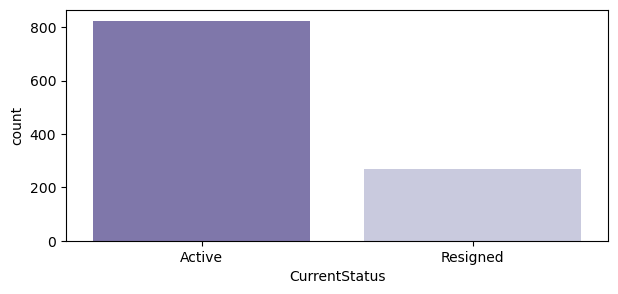

In [60]:
plt.figure(figsize=(7, 3))
sns.countplot(data=Final, x='CurrentStatus', palette='Purples_r')
plt.show()

In [61]:
a = (Final[Final["CurrentStatus"] == 'Active'].shape[0] / Final.shape[0])*100
b = (Final[Final["CurrentStatus"] == 'Resigned'].shape[0] / Final.shape[0])*100
print(f"Percentage of 'Active' Employee : {a} %")
print(f"Percentage of 'Resigned' Employee : {b} %")

Percentage of 'Active' Employee : 75.3199268738574 %
Percentage of 'Resigned' Employee : 24.680073126142595 %


**The distribution of 'Active' and 'Resigned' employees is imbalanced**

### TESTS

In [62]:
# FUNCTION FOR CHI_SQ TEST 
def tests(col):
    cross_tab = pd.crosstab(Final[col],Final["CurrentStatus"])
    #cross_tab
    stat, p, dof, expected = chi2_contingency(cross_tab) # chi2 test for two categorical var 
    # Focal cell
    alpha = 0.05
    # Print the p value
    print("p value is " + str(p))

    # Check if p value is less than or equal to alpha
    if p <= alpha:
        print('Dependent')
    else:
        print('Independent')

In [63]:
# T_TEST
def t_test(col):
    """
    Perform t-test to compare means of two groups.
    
    Args:
        col (str): The column name to compare.
    """
    statistic, pvalue = stats.ttest_ind(Final[col][Final["CurrentStatus"] == "Active"],
                                        Final[col][Final["CurrentStatus"] == "Resigned"])
    pvalue
    alpha = 0.05
    print("p value is " + str(pvalue))
    if pvalue <= alpha:
        print('There is a statistically significant difference in the means.')
    else:
        print('Same means')

In [64]:
# ANOVA TEST 
def anova_test(col):
    """
    Perform ANOVA test to determine if the dependent variable is influenced by the current status.

    Args:
        col (str): The name of the column representing the dependent variable.

    Returns:
        None
    """
    model = ols('Final[col] ~ Final["CurrentStatus"]', data=Final).fit()
    anova_result = sm.stats.anova_lm(model, type=2)
    p = anova_result["PR(>F)"][0]
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent')
    else:
        print('Independent')


### EmployeePosition

In [65]:
Final['EmployeePosition'].value_counts()

Level 7     358
Level 8     313
Level 6     233
Level 5      98
Level 4      49
Level 3      20
Level 2      11
Level A2      3
Level A3      3
Level A1      3
Level 1       2
Level 10      1
Name: EmployeePosition, dtype: int64

In [66]:
Final["EmployeePosition"].replace(to_replace=["Level 10","Level 1","Level A1","Level A3",'Level A2'],value="Others",inplace=True)

In [67]:
Final['EmployeePosition'].value_counts()

Level 7    358
Level 8    313
Level 6    233
Level 5     98
Level 4     49
Level 3     20
Others      12
Level 2     11
Name: EmployeePosition, dtype: int64

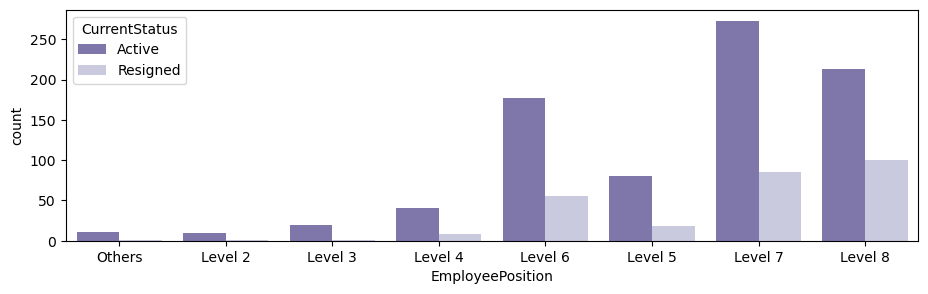

In [68]:
plt.figure(figsize=(11,3))
sns.countplot(x='EmployeePosition', hue='CurrentStatus',palette = "Purples_r", data=Final)
plt.show()

**These observations indicate an uneven distribution of employee positions within the dataset, with some levels having a higher presence while others are less represented. The majority of employees fall into 'Level 7' and 'Level 8' categories, while 'Level 1', 'Level 10', and 'Others' have the lowest representation.**

In [69]:
# chi sq test 
tests('EmployeePosition')

p value is 0.004789490624869648
Dependent


### ProfitCenter

In [70]:
Final['ProfitCenter'].value_counts()

PC - 3     429
PC - 2     341
PC - 1     272
PC - 5      28
PC - 6      18
PC - 7       2
PC - 4       1
PC - 8       1
PC - 11      1
PC - 10      1
Name: ProfitCenter, dtype: int64

In [71]:
Final["ProfitCenter"].replace(to_replace=["PC - 10","PC - 11","PC - 8","PC - 4",'PC - 7'],value="Others",inplace=True)

In [72]:
Final['ProfitCenter'].value_counts()

PC - 3    429
PC - 2    341
PC - 1    272
PC - 5     28
PC - 6     18
Others      6
Name: ProfitCenter, dtype: int64

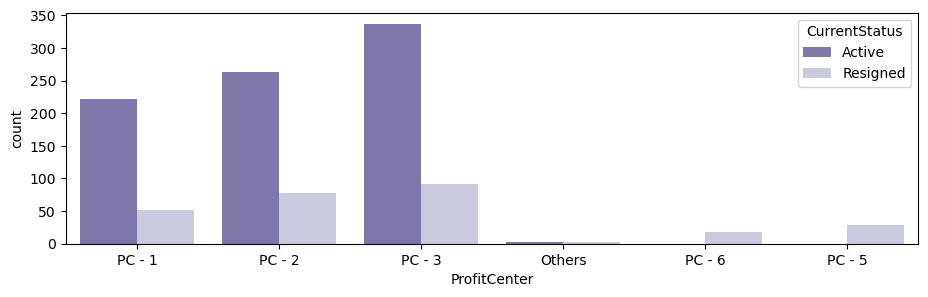

In [73]:
plt.figure(figsize=(11,3))
sns.countplot(x='ProfitCenter', hue='CurrentStatus',palette = "Purples_r",data=Final)
plt.show()

**The 'ProfitCenter' column exhibits an imbalanced distribution, with PC-3 being the most frequently occurring category, followed by PC-2 and PC-1. PC-5, PC-6, and 'Others' have considerably fewer occurrences.**

In [74]:
# chi-sq test 
tests('ProfitCenter')

p value is 9.88432135737099e-31
Dependent


### EmployeeLocation

In [75]:
Final['EmployeeLocation'].value_counts()

Location 1    344
Location 7    297
Location 3    243
Location 9     61
Location 2     48
Location 8     43
Location 4     43
Location 5      8
Location 6      7
Name: EmployeeLocation, dtype: int64

In [76]:
Final["EmployeeLocation"].replace(to_replace=["Location 5","Location 6"],value="Others",inplace=True)

In [77]:
Final['EmployeeLocation'].value_counts()

Location 1    344
Location 7    297
Location 3    243
Location 9     61
Location 2     48
Location 8     43
Location 4     43
Others         15
Name: EmployeeLocation, dtype: int64

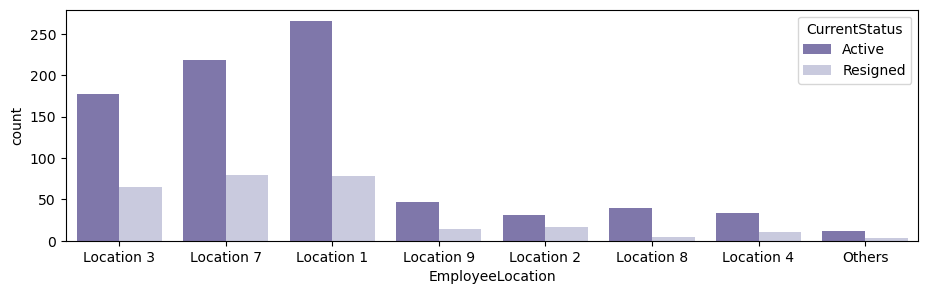

In [78]:
plt.figure(figsize=(11,3))
sns.countplot(x='EmployeeLocation', hue='CurrentStatus',palette = "Purples_r", data=Final)
plt.show()

**The 'EmployeeLocation' column shows an imbalanced distribution among the different categories. The majority of employees are assigned to Location 1, which has the highest count of 344. In contrast, Locations 9, 2, 8, and 4 have a relatively smaller number of employees, each with counts of 61, 48, 43, and 43 respectively.**

In [79]:
# chi-sq test 
tests("EmployeeLocation")

p value is 0.15410577412393053
Independent


### PeopleGroup

In [80]:
Final['PeopleGroup'].value_counts()

Client Service Staff    1084
Support Staff             10
Name: PeopleGroup, dtype: int64

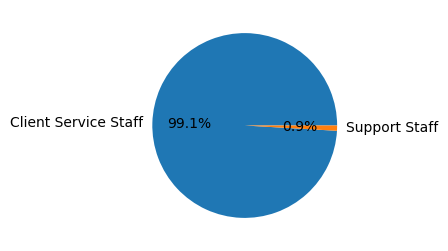

In [81]:
plt.figure(figsize=(11,3))
plt.pie(Final['PeopleGroup'].value_counts(), labels=Final['PeopleGroup'].value_counts().index, autopct='%1.1f%%')
plt.show()

**The 'PeopleGroup' column exhibits an imbalanced distribution, with 'Client Service Staff' being the predominant category, occurring 1084 times. The category 'Support Staff' has significantly fewer occurrences, appearing only 10 times.**

In [82]:
# chi sq test 
tests("PeopleGroup")

p value is 0.47568831597615113
Independent


#### this column does not impact my dependent column we can remove them.

### Supervisorname

In [83]:
Final['Supervisorname'].value_counts()

Hedi Elna              20
Cacilia Aimee          20
Tallia Eyde            18
Myrtie Brana           16
Jolyn Briney           16
Orsa Margeaux          16
Jillian Lorelei        15
Lindy Marguerite       15
Trenna Mureil          15
Terza Gwyn             14
Guenevere Florida      14
Ali Elsinore           14
Kynthia Hildy          14
Dottie Bidget          14
Laetitia Yoshi         13
Frances Mignonne       13
Rosabella Arlina       13
Tiena Hatti            13
Daryl Natalina         12
Nikolia Shirl          12
Annnora Gabrielle      12
Gert Editha            12
Ophelie Jyoti          12
Nerita Anet            12
Marys Essy             11
Danette Melinda        11
Misti Helena           11
Aimil Latisha          11
Lian Harley            11
Tatiana Roxanna        11
Lenora Nydia           11
Orelee Hanna           11
Rochette Jilleen       10
Revkah Stephie         10
Vonni Bethena          10
Christina Desdemona    10
Marney Anderea         10
Imelda Madalena        10
Cherise Lain

In [84]:
vals = Final['Supervisorname'].value_counts().loc[lambda x: x <= 12].index
Final["Supervisorname"].replace(to_replace = vals ,value="Others",inplace=True)

In [85]:
Final['Supervisorname'].value_counts()

Others               821
Cacilia Aimee         20
Hedi Elna             20
Tallia Eyde           18
Orsa Margeaux         16
Myrtie Brana          16
Jolyn Briney          16
Lindy Marguerite      15
Trenna Mureil         15
Jillian Lorelei       15
Kynthia Hildy         14
Dottie Bidget         14
Guenevere Florida     14
Ali Elsinore          14
Terza Gwyn            14
Frances Mignonne      13
Laetitia Yoshi        13
Tiena Hatti           13
Rosabella Arlina      13
Name: Supervisorname, dtype: int64

In [86]:
plt.figure(figsize=(25, 3))
#sns.countplot(Final['Supervisorname'])
plt.show()

<Figure size 2500x300 with 0 Axes>

**The 'Supervisorname' column shows an uneven distribution, with one dominant category ('Others') and a wide variation in occurrence for the named supervisors.**

In [87]:
tests("Supervisorname")

p value is 1.495999034477368e-05
Dependent


### EmployeeCategory

In [88]:
Final['EmployeeCategory'].value_counts()

Confirmed Staff                        676
Serving Notice Period                  160
Resigned                               138
Staff on Probation                      91
SVP/VP                                   9
Secondee-Outward-Without Pay             9
Awaiting Termination                     3
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed-Sabbatical                     2
Fixed term Staff                         2
Level 1/2                                1
Confirmed Staff (Part-Time 4 Hours)      1
Name: EmployeeCategory, dtype: int64

In [89]:
remove = ['Awaiting Termination','Confirmed Staff (Part-Time 6 Hours)','Confirmed-Sabbatical','Fixed term Staff',
         'Level 1/2','Confirmed Staff (Part-Time 4 Hours)']

In [90]:
Final["EmployeeCategory"].replace(to_replace = remove,value="Others",inplace=True)

In [91]:
Final['EmployeeCategory'].value_counts()

Confirmed Staff                 676
Serving Notice Period           160
Resigned                        138
Staff on Probation               91
Others                           11
SVP/VP                            9
Secondee-Outward-Without Pay      9
Name: EmployeeCategory, dtype: int64

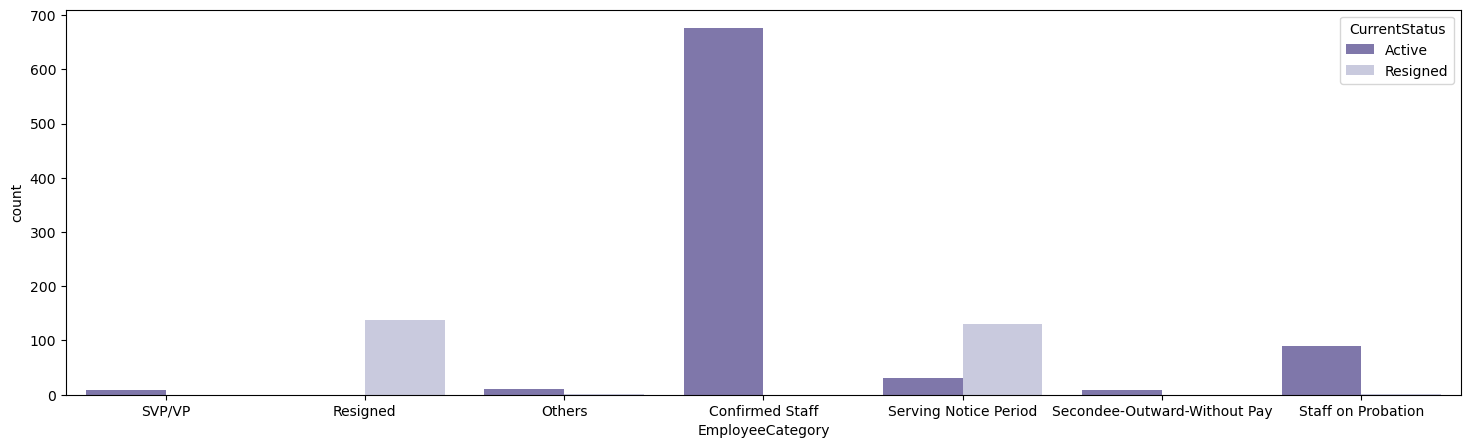

In [92]:
plt.figure(figsize=(18,5))
sns.countplot(x='EmployeeCategory', hue='CurrentStatus',palette = "Purples_r", data=Final)
plt.show()

**he 'EmployeeCategory' column demonstrates a distribution of employees across different categories, with 'Confirmed Staff' being the largest category, followed by 'Serving Notice Period', 'Resigned', 'Staff on Probation', and a smaller number of employees falling into 'Others', 'SVP/VP', and 'Secondee-Outward-Without Pay' categories.**

In [93]:
tests("EmployeeCategory")

p value is 1.54315746923914e-202
Dependent


### TotalHours_year_

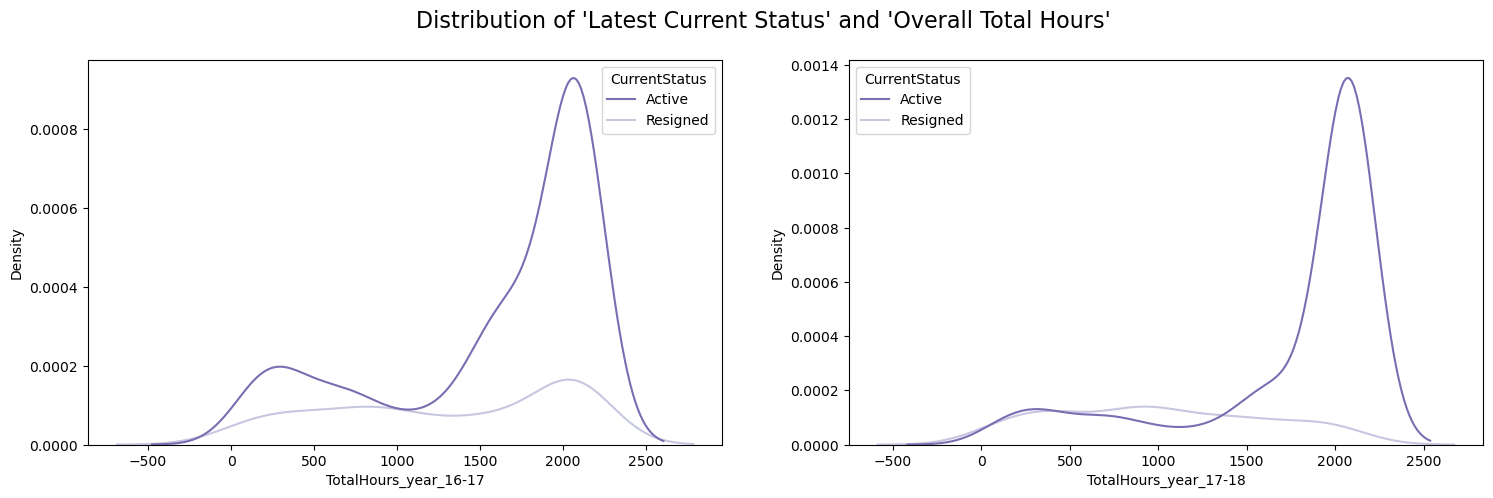

In [94]:
# TotalHours_year_ distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='TotalHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='TotalHours_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of 'Latest Current Status' and 'Overall Total Hours'", fontsize=16)
plt.show()

In [95]:
anova_test("TotalHours_year_16-17")
anova_test("TotalHours_year_17-18")

p value is 3.756274790582551e-09
Dependent
p value is 3.174908652391512e-64
Dependent


In [96]:
t_test("TotalHours_year_16-17")

t_test("TotalHours_year_17-18")

p value is 3.7562747905787046e-09
There is a statistically significant difference in the means.
p value is 3.174908652387765e-64
There is a statistically significant difference in the means.


###  TotalAvailableHours_year_

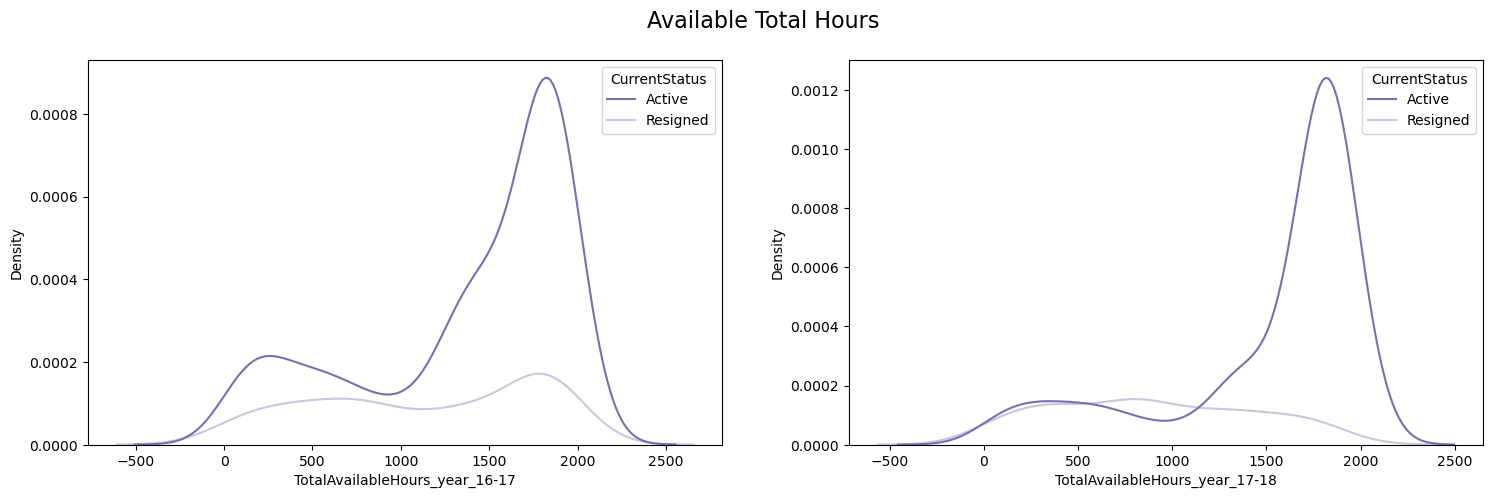

In [97]:
# TotalHours_year_ distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='TotalAvailableHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='TotalAvailableHours_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle('Distribution of Current Status' and 'Available Total Hours', fontsize=16)
plt.show()

In [98]:
anova_test("TotalAvailableHours_year_16-17")
anova_test("TotalAvailableHours_year_17-18")

p value is 1.1455737414030359e-08
Dependent
p value is 4.374000245898321e-56
Dependent


In [99]:
t_test("TotalAvailableHours_year_16-17")
t_test("TotalAvailableHours_year_17-18")

p value is 1.1455737414020285e-08
There is a statistically significant difference in the means.
p value is 4.374000245892268e-56
There is a statistically significant difference in the means.


### WorkHours_year_

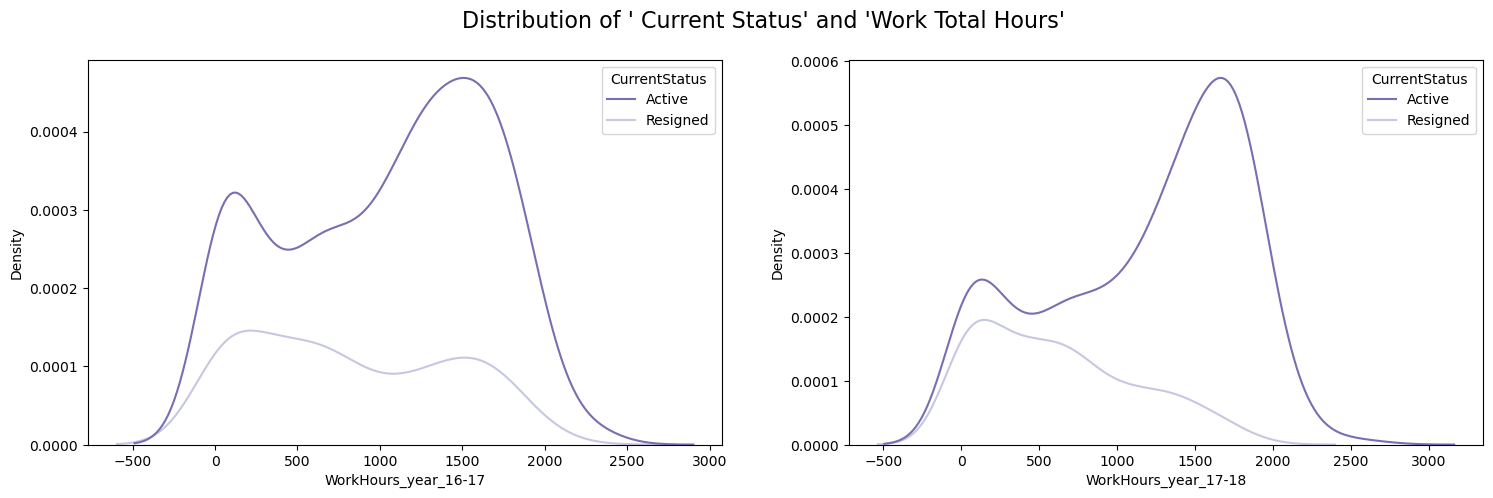

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='WorkHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='WorkHours_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of ' Current Status' and 'Work Total Hours'", fontsize=16)
plt.show()

In [101]:
anova_test("WorkHours_year_16-17")
anova_test("WorkHours_year_17-18")

p value is 4.4931297524473734e-07
Dependent
p value is 2.3328770739706976e-37
Dependent


In [102]:
t_test("WorkHours_year_16-17")
t_test("WorkHours_year_17-18")

p value is 4.4931297524437693e-07
There is a statistically significant difference in the means.
p value is 2.3328770739680875e-37
There is a statistically significant difference in the means.


### LeaveHours_year_16-17 

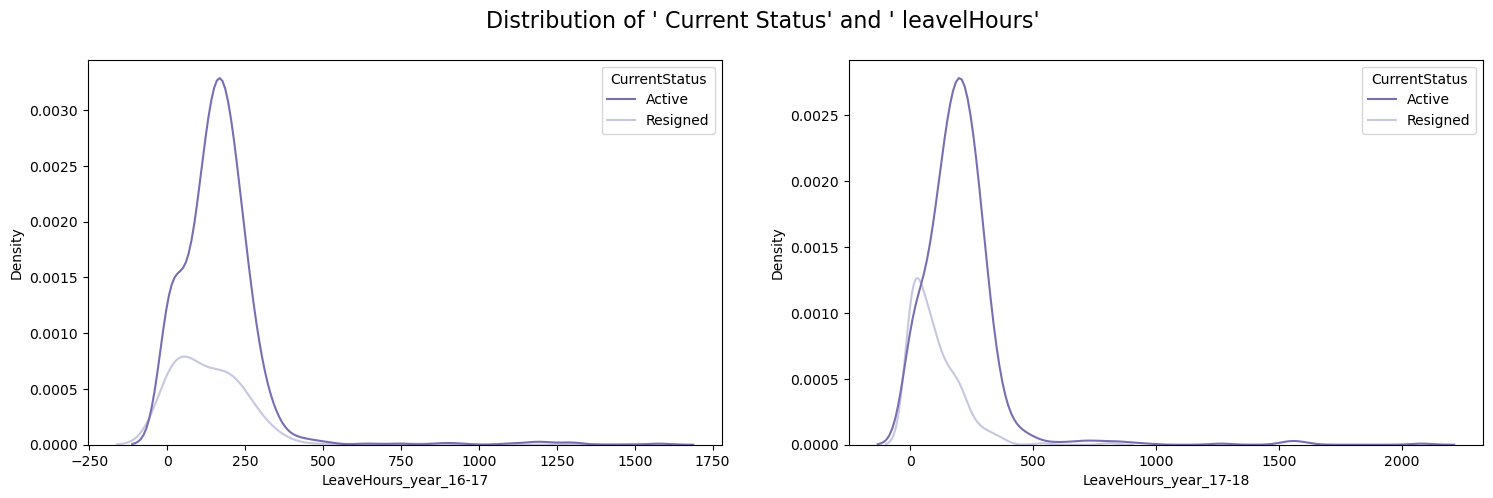

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='LeaveHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='LeaveHours_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of ' Current Status' and ' leavelHours'", fontsize=16)
plt.show()

In [104]:
anova_test("LeaveHours_year_16-17")
anova_test("LeaveHours_year_17-18")

p value is 0.041001549222219054
Dependent
p value is 5.533496242710437e-21
Dependent


In [105]:
t_test("LeaveHours_year_16-17")
t_test("LeaveHours_year_17-18")

p value is 0.04100154922218497
There is a statistically significant difference in the means.
p value is 5.533496242706061e-21
There is a statistically significant difference in the means.


### TrainingHours_year_16-17

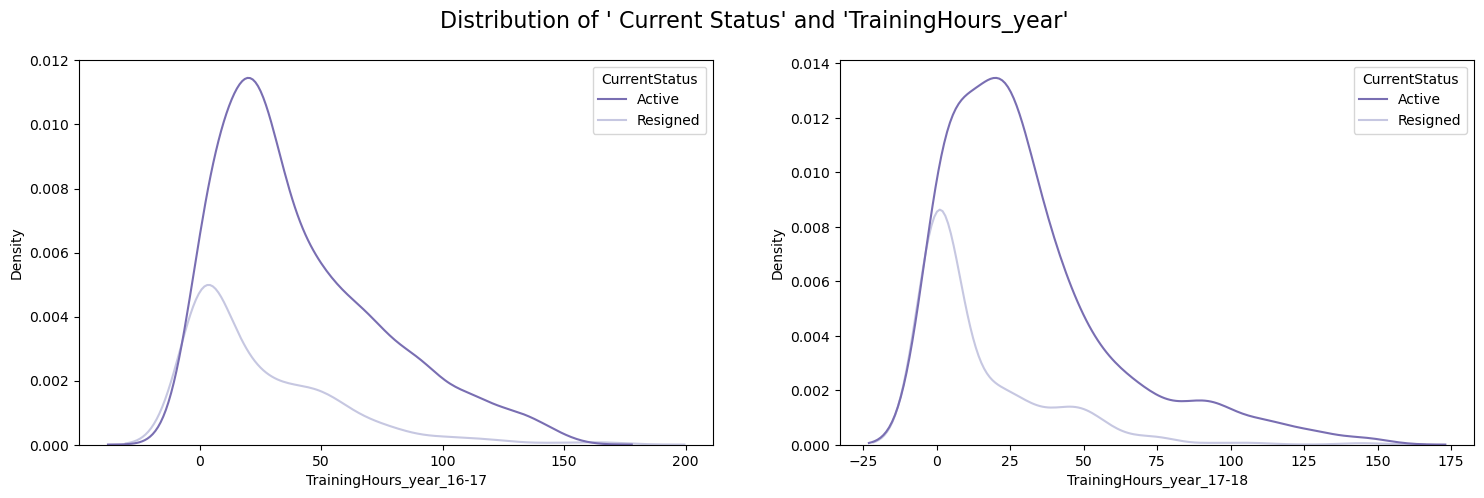

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='TrainingHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='TrainingHours_year_17-18',hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of ' Current Status' and 'TrainingHours_year'", fontsize=16)
plt.show()

In [107]:
anova_test("TrainingHours_year_16-17")
anova_test("TrainingHours_year_17-18")

p value is 1.505002648931066e-11
Dependent
p value is 1.1541118323047503e-17
Dependent


In [108]:
t_test("TrainingHours_year_16-17")
t_test("TrainingHours_year_17-18")

p value is 1.5050026489300562e-11
There is a statistically significant difference in the means.
p value is 1.1541118323039138e-17
There is a statistically significant difference in the means.


### BDHours_year_16-17

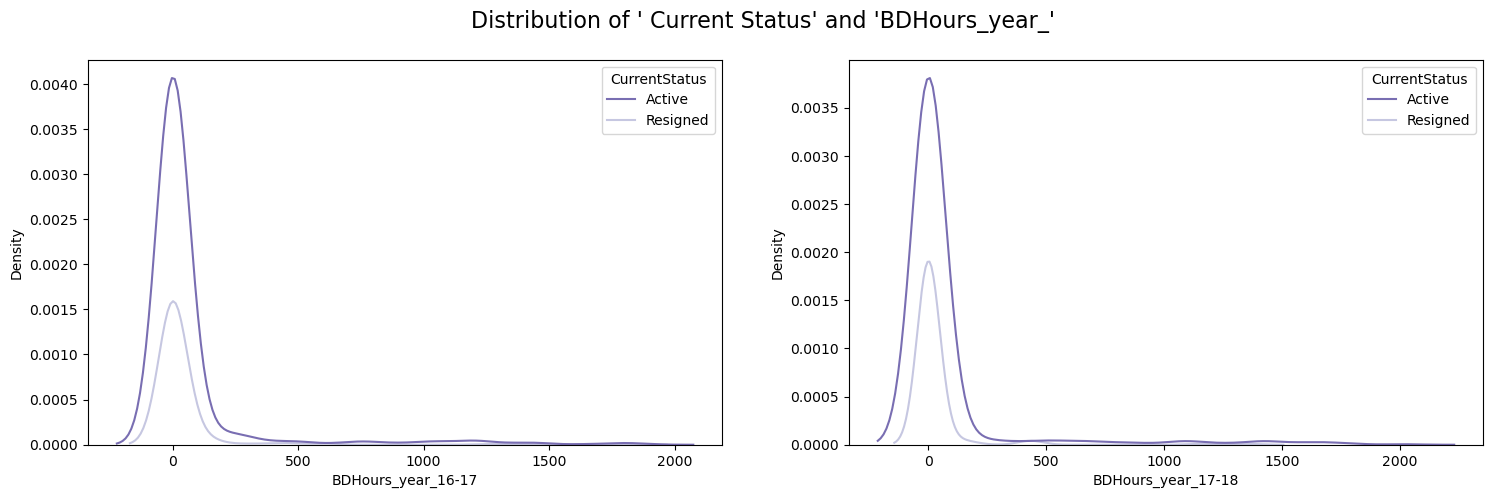

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data=Final, x='BDHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='BDHours_year_17-18',hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of ' Current Status' and 'BDHours_year_'", fontsize=16)
plt.show()

In [110]:
anova_test("BDHours_year_16-17")
anova_test("BDHours_year_17-18")

p value is 0.05819663724866013
Independent
p value is 0.017083623038609254
Dependent


In [111]:
t_test("BDHours_year_16-17")
t_test("BDHours_year_17-18")

p value is 0.05819663724862152
Same means
p value is 0.017083623038596275
There is a statistically significant difference in the means.


### NCHours_year_

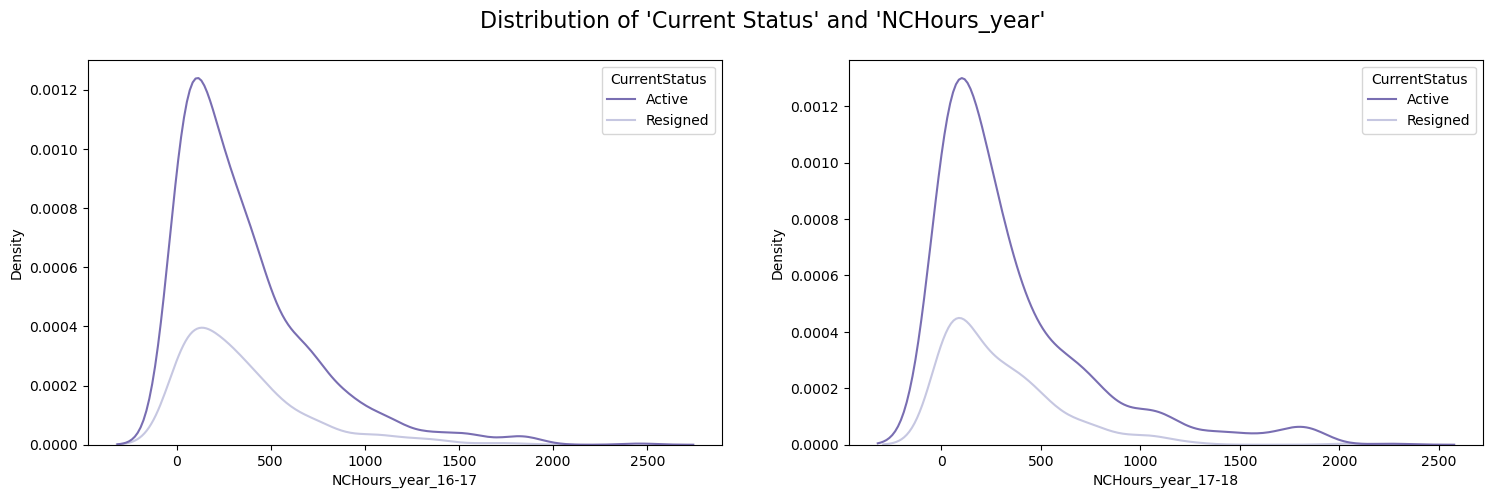

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.kdeplot(data=Final, x='NCHours_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='NCHours_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of 'Current Status' and 'NCHours_year'", fontsize=16)
plt.show()

In [113]:
anova_test("NCHours_year_16-17")
anova_test("NCHours_year_17-18")

p value is 0.3926965095640266
Independent
p value is 0.021188016044182995
Dependent


In [114]:
t_test("NCHours_year_16-17")
t_test("NCHours_year_17-18")

p value is 0.39269650956448565
Same means
p value is 0.021188016044167594
There is a statistically significant difference in the means.


### Utilization%_year_

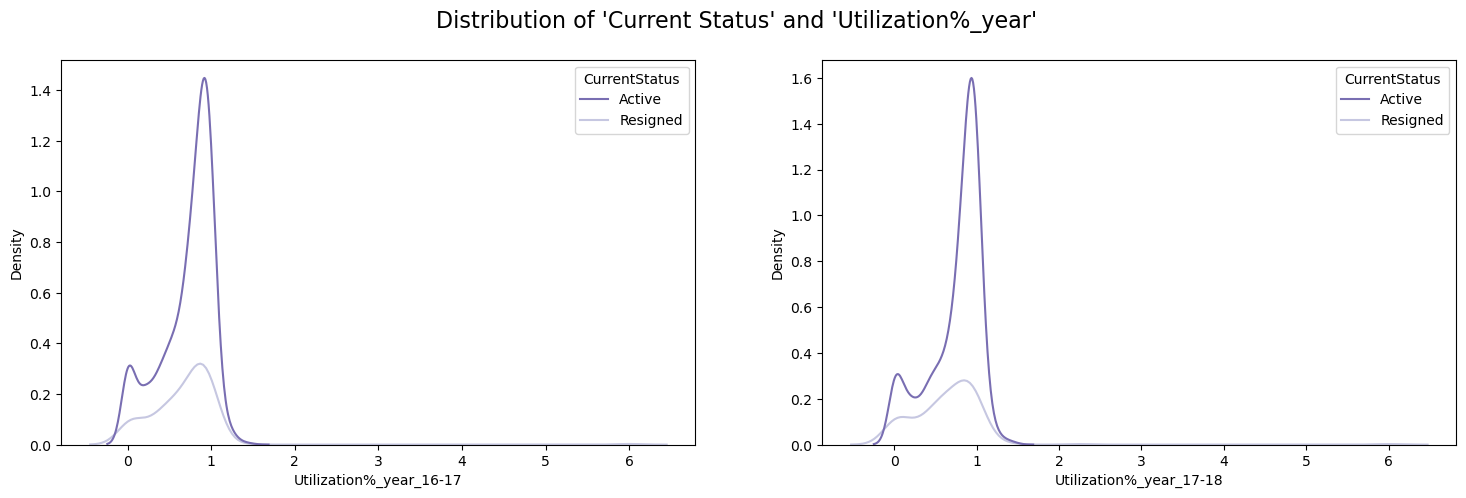

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.kdeplot(data=Final, x='Utilization%_year_16-17', hue='CurrentStatus', ax=axes[0], palette="Purples_r")
sns.kdeplot(data=Final, x='Utilization%_year_17-18', hue='CurrentStatus', ax=axes[1], palette="Purples_r")
plt.suptitle("Distribution of 'Current Status' and 'Utilization%_year'", fontsize=16)
plt.show()

In [116]:
anova_test("Utilization%_year_16-17")
anova_test("Utilization%_year_17-18")

p value is 0.09419835783466947
Independent
p value is 5.882858494809454e-05
Dependent


In [117]:
t_test("Utilization%_year_16-17")
t_test("Utilization%_year_17-18")

p value is 0.09419835783460569
Same means
p value is 5.882858494804727e-05
There is a statistically significant difference in the means.


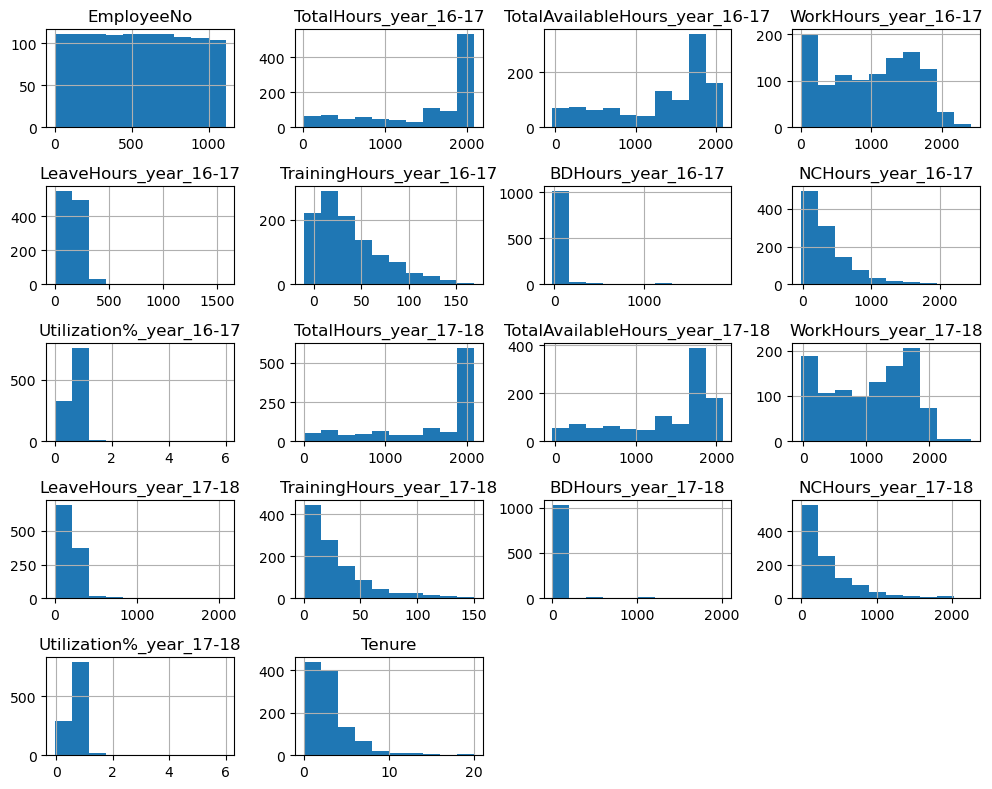

In [118]:
Final.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

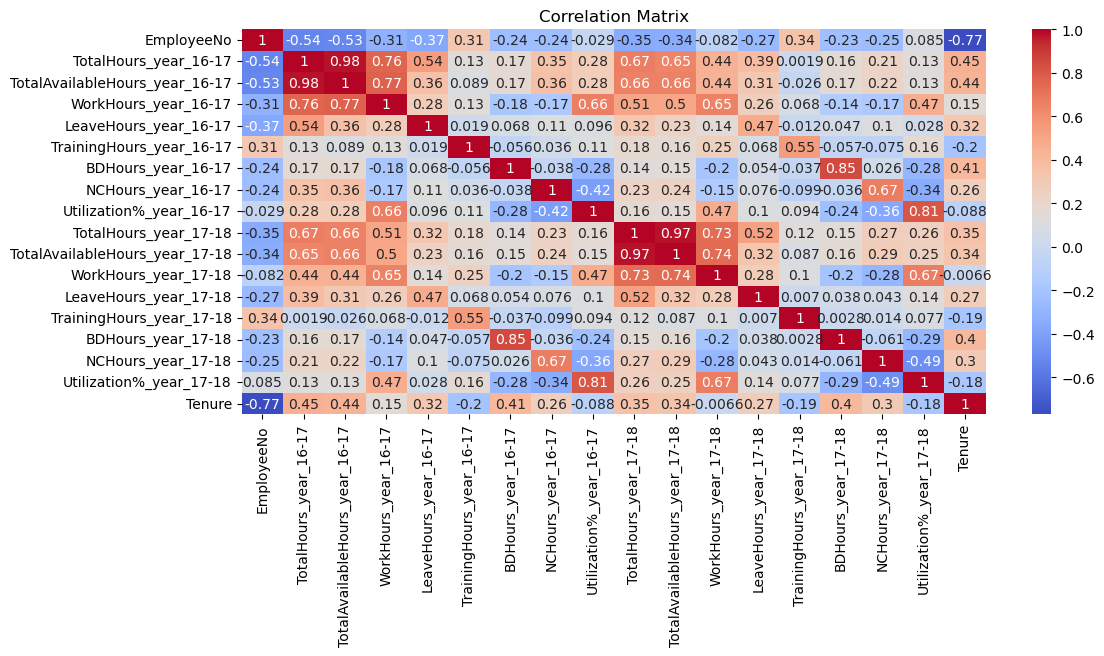

In [119]:
plt.figure(figsize=(12,5))
sns.heatmap(Final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

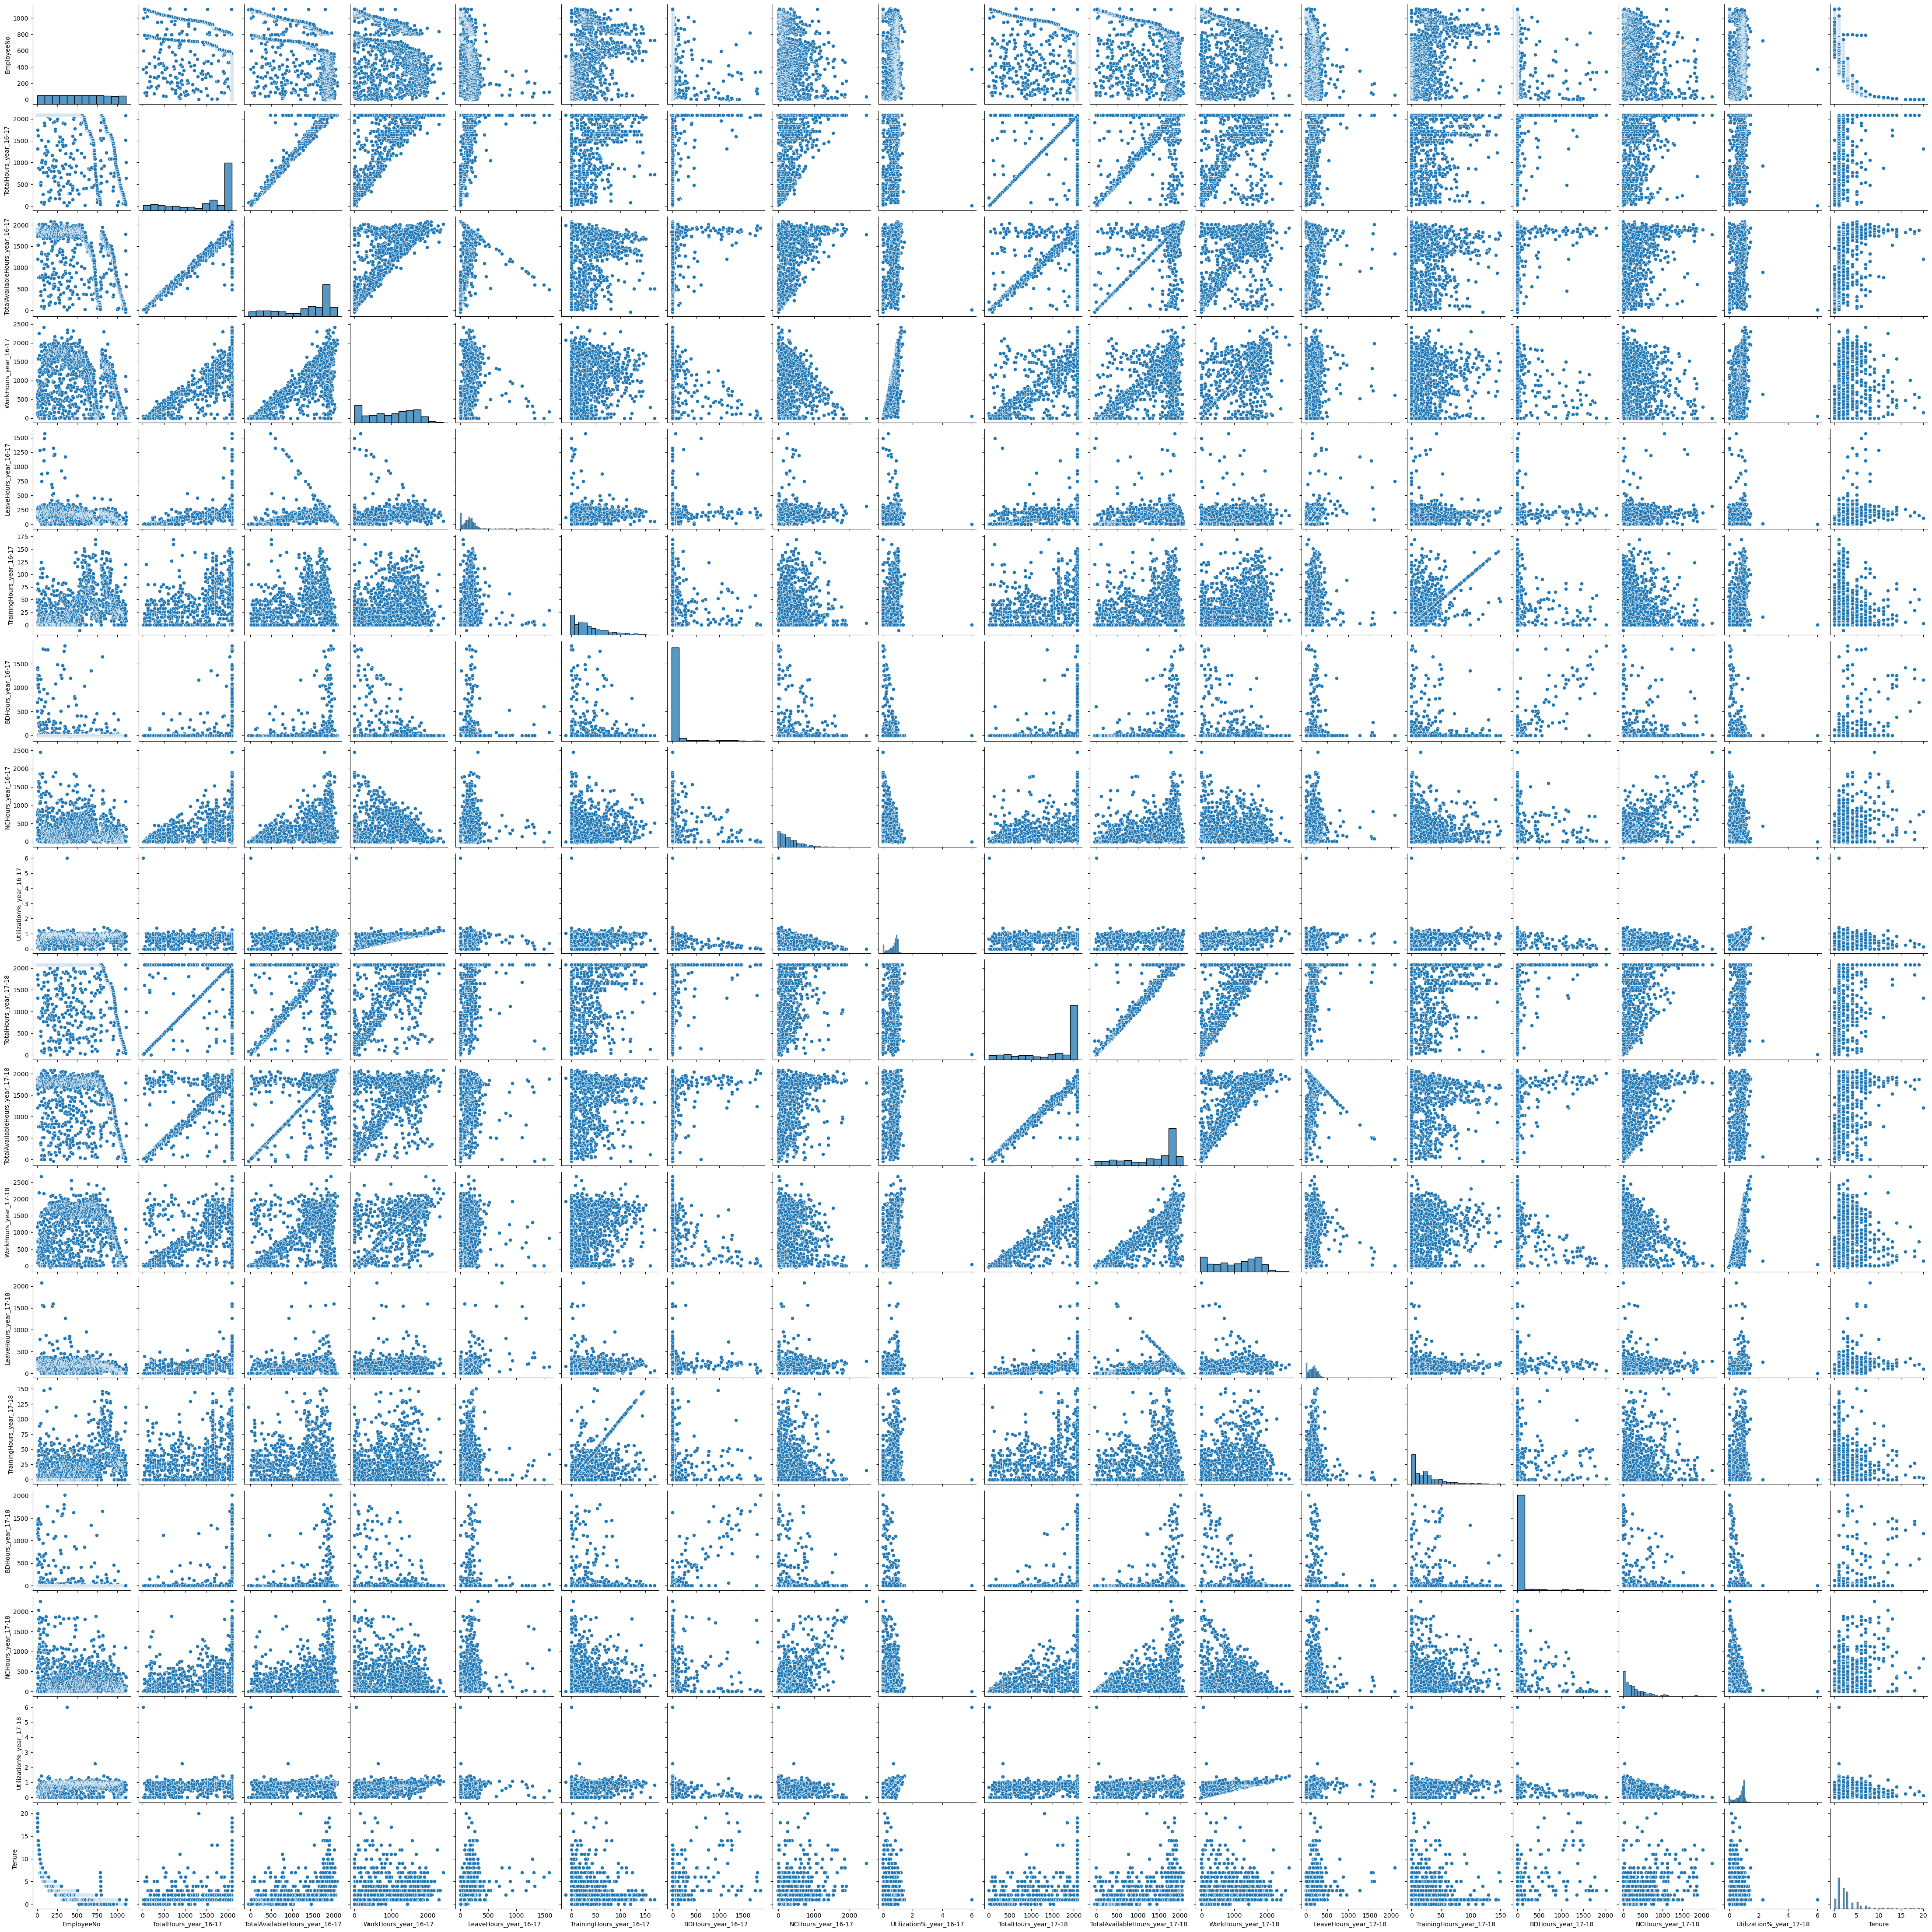

In [120]:
sns.pairplot(data=Final)
plt.show()

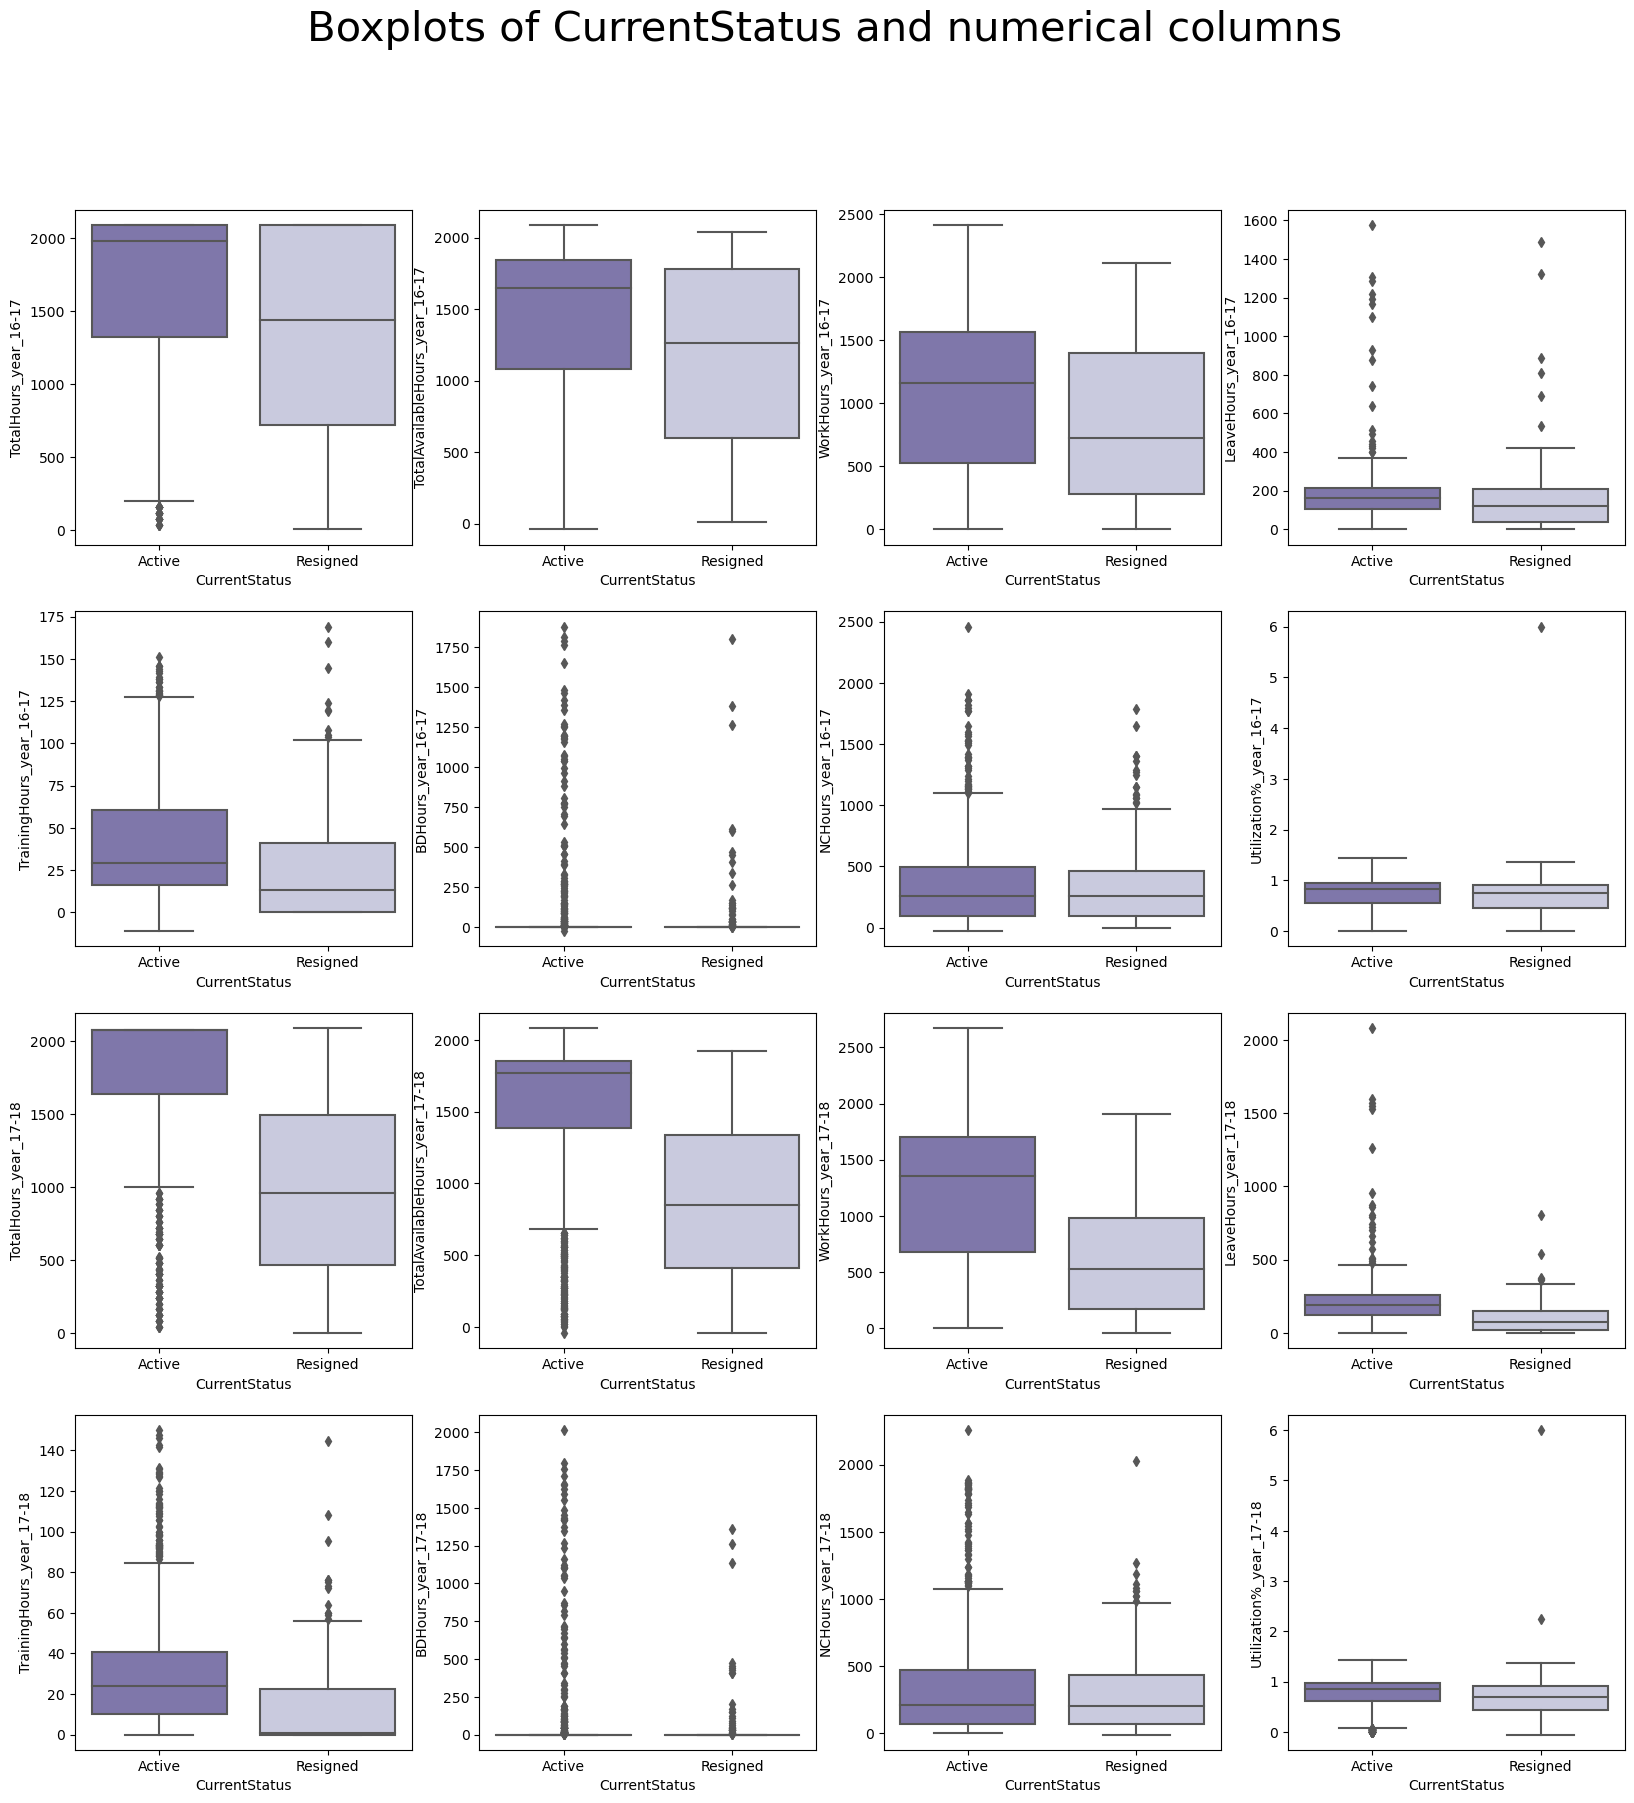

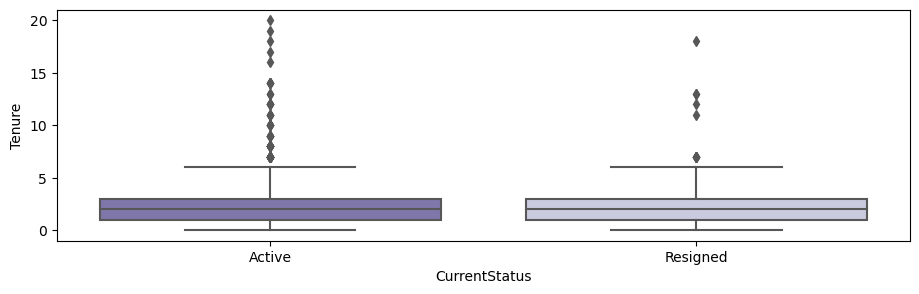

In [122]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Boxplots of CurrentStatus and numerical columns', fontsize=30)
sns.boxplot(ax=axes[0,0],data=Final,x="CurrentStatus",y='TotalHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[0,1],data=Final,x="CurrentStatus",y='TotalAvailableHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[0,2],data=Final,x="CurrentStatus",y='WorkHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[0,3],data=Final,x="CurrentStatus",y='LeaveHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[1,0],data=Final,x="CurrentStatus",y='TrainingHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[1,1],data=Final,x="CurrentStatus",y='BDHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[1,2],data=Final,x="CurrentStatus",y='NCHours_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[1,3],data=Final,x="CurrentStatus",y='Utilization%_year_16-17',palette = "Purples_r")
sns.boxplot(ax=axes[2,0],data=Final,x="CurrentStatus",y='TotalHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[2,1],data=Final,x="CurrentStatus",y='TotalAvailableHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[2,2],data=Final,x="CurrentStatus",y='WorkHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[2,3],data=Final,x="CurrentStatus",y='LeaveHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[3,0],data=Final,x="CurrentStatus",y='TrainingHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[3,1],data=Final,x="CurrentStatus",y='BDHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[3,2],data=Final,x="CurrentStatus",y='NCHours_year_17-18',palette = "Purples_r")
sns.boxplot(ax=axes[3,3],data=Final,x="CurrentStatus",y='Utilization%_year_17-18',palette = "Purples_r")
plt.show()

plt.figure(figsize=(11,3))
sns.boxplot(data=Final,x="CurrentStatus",y='Tenure',palette = "Purples_r")
plt.show()

###  remove  insignificant and independent

In [122]:
# Remove the independent columns
Final = Final.drop(['NCHours_year_16-17', 'Utilization%_year_16-17','BDHours_year_16-17','EmployeeLocation','PeopleGroup'], axis=1)

#### these two column are independent 'NCHours_year_16-17','Utilization%_year_16-17' ,'PeopleGroup', 'EmployeeLocation'we remove them .their is no use of it .

## Standard-Scaler

In [123]:
from sklearn.preprocessing import StandardScaler

# Standard-Scaler
for column in Final.columns:
    if column != 'EmployeeNo' and column != 'CurrentStatus':
        if Final[column].dtype != 'O':
            scaler = StandardScaler()
            Final[column] = scaler.fit_transform(Final[[column]])

In [124]:
Final.head()

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeCategory  \
0           1        Active           Others       PC - 1           SVP/VP   
1           2        Active          Level 2       PC - 2           SVP/VP   
2           3        Active          Level 2       PC - 2           SVP/VP   
3           4      Resigned          Level 2       PC - 3         Resigned   
4           5        Active           Others       Others           Others   

  Supervisorname  TotalHours_year_16-17  TotalAvailableHours_year_16-17  \
0         Others               0.831189                        0.783878   
1         Others               0.831189                        0.914711   
2         Others               0.831189                        0.941696   
3         Others               0.831189                        0.864013   
4         Others              -0.305623                       -0.192467   

   WorkHours_year_16-17  LeaveHours_year_16-17  TrainingHours_year_16-17  \
0             -0.564384               0.369121                  0.964619   
1             -0.692825              -0.034566                  0.379800   
2              0.023571              -0.115303                  0.248216   
3             -1.143565               0.315296                 -0.234260   
4             -1.341411              -0.384428                 -0.994524   

   TotalHours_year_17-18  TotalAvailableHours_year_17-18  \
0               0.767306                        0.837993   
1               0.767306                        0.843859   
2               0.767306                        0.595811   
3               0.408610                        0.462569   
4              -0.380522                       -0.267330   

   WorkHours_year_17-18  LeaveHours_year_17-18  TrainingHours_year_17-18  \
0             -0.915011               0.074011                  0.024483   
1             -0.492141               0.197786                 -0.795030   
2              0.203898               1.002326                 -0.167318   
3             -1.185093               0.123521                 -0.812466   
4             -1.376465              -0.445846                 -0.829903   

   BDHours_year_17-18  NCHours_year_17-18  Utilization%_year_17-18    Tenure  
0            5.514604           -0.835467                -1.322445  5.678544  
1            2.172403            0.677328                -0.922196  6.050117  
2            1.621402            0.052336                -0.113469  5.306971  
3            5.231059           -0.819777                -1.524625  5.678544  
4            4.418635            1.256557                -1.641667  6.421690

## Encording

In [125]:
# Encoding Categorical variable 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2, 3, 4, 5])],
    remainder="passthrough"
)
Final_encoded = ct.fit_transform(Final)

In [126]:
# Create a DataFrame from Final_encoded using the column names from ct.get_feature_names_out()
Final = pd.DataFrame(Final_encoded, columns=ct.get_feature_names_out())

In [127]:
Final.head()

encoder__EmployeePosition_Level 2 encoder__EmployeePosition_Level 3  \
0                               0.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               0.0                               0.0   

  encoder__EmployeePosition_Level 4 encoder__EmployeePosition_Level 5  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

  encoder__EmployeePosition_Level 6 encoder__EmployeePosition_Level 7  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

  encoder__EmployeePosition_Level 8 encoder__EmployeePosition_Others  \
0                               0.0                              1.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              1.0   

  encoder__ProfitCenter_Others encoder__ProfitCenter_PC - 1  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          1.0                          0.0   

  encoder__ProfitCenter_PC - 2 encoder__ProfitCenter_PC - 3  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          1.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          0.0   

  encoder__ProfitCenter_PC - 5 encoder__ProfitCenter_PC - 6  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

  encoder__EmployeeCategory_Confirmed Staff encoder__EmployeeCategory_Others  \
0                                       0.0                              0.0   
1                                       0.0                              0.0   
2                                       0.0                              0.0   
3                                       0.0                              0.0   
4                                       0.0                              1.0   

  encoder__EmployeeCategory_Resigned encoder__EmployeeCategory_SVP/VP  \
0                                0.0                              1.0   
1                                0.0                              1.0   
2                                0.0                              1.0   
3                                1.0                              0.0   
4                                0.0                              0.0   

  encoder__EmployeeCategory_Secondee-Outward-Without Pay  \
0                                                0.0       
1                                                0.0       
2              

## train test split

In [128]:
from sklearn.model_selection import train_test_split

#Separting our dependent and independent feature
Dep_data=Final['remainder__CurrentStatus']
Ind_data=Final.drop(['remainder__CurrentStatus'],axis=1)

train_X,test_X,train_y,test_y=train_test_split(Ind_data,Dep_data,test_size=0.2,random_state=41)

print("Size of Dataset after splitting :-",train_X.shape,train_y.shape,test_X.shape,test_y.shape)



Size of Dataset after splitting :- (875, 55) (875,) (219, 55) (219,)


## Feature Selection 

In [129]:
from sklearn.ensemble import RandomForestClassifier
#create a random forest classifier
clf=RandomForestClassifier(n_estimators=10,random_state=0, n_jobs=-1)
#train the classifier
clf.fit(train_X,train_y)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [130]:
feat_labels=train_X.columns.values
feature_importance=[]
for feature in zip(feat_labels,clf.feature_importances_):
    #print(feature)
    feature_importance.append(feature)

In [131]:
feature_importance

[('encoder__EmployeePosition_Level 2', 0.0),
 ('encoder__EmployeePosition_Level 3', 0.0),
 ('encoder__EmployeePosition_Level 4', 0.0005236687567514638),
 ('encoder__EmployeePosition_Level 5', 0.004474182975356784),
 ('encoder__EmployeePosition_Level 6', 0.0007904459472149053),
 ('encoder__EmployeePosition_Level 7', 0.00328193458538907),
 ('encoder__EmployeePosition_Level 8', 0.001724294442114757),
 ('encoder__EmployeePosition_Others', 1.2567947350556395e-05),
 ('encoder__ProfitCenter_Others', 0.0),
 ('encoder__ProfitCenter_PC - 1', 0.0022277871552979106),
 ('encoder__ProfitCenter_PC - 2', 0.0014825615605969314),
 ('encoder__ProfitCenter_PC - 3', 0.0030907555896844984),
 ('encoder__ProfitCenter_PC - 5', 0.01824704097664052),
 ('encoder__ProfitCenter_PC - 6', 0.0078077380966404),
 ('encoder__EmployeeCategory_Confirmed Staff', 0.12642318758455465),
 ('encoder__EmployeeCategory_Others', 0.005140918284639031),
 ('encoder__EmployeeCategory_Resigned', 0.27034704963735007),
 ('encoder__Employe

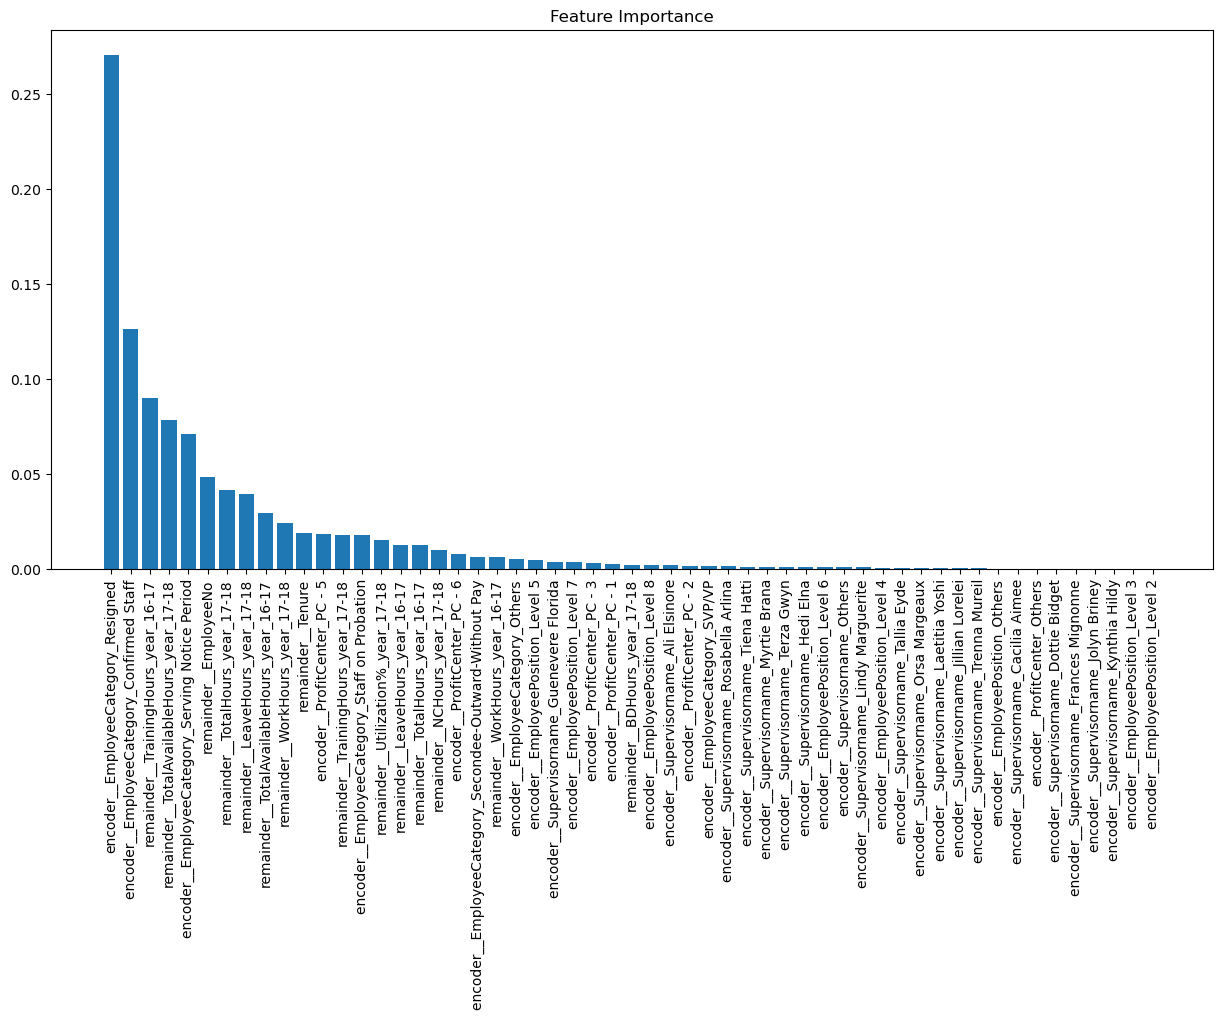

In [132]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices if i < len(train_X.columns)]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(len(names)), importances[indices][:len(names)])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()


In [133]:
from sklearn.feature_selection import SelectFromModel


sfm=SelectFromModel(clf,max_features =10,threshold=-np.inf)
sfm.fit(train_X,train_y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                 random_state=0),
                max_features=10, threshold=-inf)

In [134]:
selected_features=[]
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [135]:
selected_features

['encoder__EmployeeCategory_Confirmed Staff',
 'encoder__EmployeeCategory_Resigned',
 'encoder__EmployeeCategory_Serving Notice Period',
 'remainder__EmployeeNo',
 'remainder__TotalAvailableHours_year_16-17',
 'remainder__TrainingHours_year_16-17',
 'remainder__TotalHours_year_17-18',
 'remainder__TotalAvailableHours_year_17-18',
 'remainder__WorkHours_year_17-18',
 'remainder__LeaveHours_year_17-18']

In [136]:
train_X= pd.DataFrame(sfm.transform(train_X))
test_X= pd.DataFrame(sfm.transform(test_X))

In [137]:
print(train_X.shape)
print(test_X.shape)

(875, 10)
(219, 10)


## Model Building

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix

In [139]:
validation_dict={}
def Model_Result(actual, pred):
    print("Confusion Matrix")
    confusion = confusion_matrix(actual, pred)
    print(confusion)
    print("**********************************************************")
    accuracy = accuracy_score(actual, pred)
    recall = recall_score(actual, pred, pos_label='Active')
    precision = precision_score(actual, pred, pos_label='Active')
    f1 = f1_score(actual, pred, pos_label='Active')

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")

    metrics = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1
    }

    return metrics

In [140]:
def different_model(model):
    """
    Applies the given model to the training data and evaluates its performance on the test data.
    
    Parameters:
        model: An instance of a scikit-learn classifier.
        
    Returns:
        None
    """
    ml=model
    
    ml.fit(train_X,train_y)
    
    pred_y = ml.predict(test_X)
    
    return_list=Model_Result(test_y,pred_y)
    validation_dict[model]=return_list


In [141]:
# Logistics regression
different_model(LogisticRegression(random_state=2))

Confusion Matrix
[[171   2]
 [  1  45]]
**********************************************************
Accuracy: 0.9863013698630136
Recall: 0.9884393063583815
Precision: 0.9941860465116279
F1 Score: 0.991304347826087


In [142]:
# DecisionTreeClassifier
different_model(DecisionTreeClassifier())

Confusion Matrix
[[172   1]
 [  1  45]]
**********************************************************
Accuracy: 0.9908675799086758
Recall: 0.9942196531791907
Precision: 0.9942196531791907
F1 Score: 0.9942196531791907


In [143]:
# RandomForestClassifier
different_model(RandomForestClassifier(random_state=1))

Confusion Matrix
[[173   0]
 [  1  45]]
**********************************************************
Accuracy: 0.9954337899543378
Recall: 1.0
Precision: 0.9942528735632183
F1 Score: 0.9971181556195965


In [144]:
 KNeighborsClassifier
different_model(KNeighborsClassifier())

Confusion Matrix
[[163  10]
 [ 33  13]]
**********************************************************
Accuracy: 0.8036529680365296
Recall: 0.9421965317919075
Precision: 0.8316326530612245
F1 Score: 0.8834688346883469


In [145]:
# gradient boosting 
different_model(GradientBoostingClassifier())

Confusion Matrix
[[173   0]
 [  1  45]]
**********************************************************
Accuracy: 0.9954337899543378
Recall: 1.0
Precision: 0.9942528735632183
F1 Score: 0.9971181556195965


## Final Model 

#### Rondom forest give me best result . i choose that one for my prediction 

In [146]:
#model
RF=RandomForestClassifier()
RF_M=RF.fit(train_X,train_y)
pred_y=RF_M.predict(test_X)

In [147]:
pred_y[0:10]

array(['Active', 'Active', 'Active', 'Active', 'Active', 'Active',
       'Active', 'Resigned', 'Active', 'Active'], dtype=object)

In [148]:
test_y[0:10]

886       Active
859       Active
0         Active
995       Active
1066      Active
40        Active
908       Active
373     Resigned
663       Active
372       Active
Name: remainder__CurrentStatus, dtype: object

In [149]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# Classification Report :
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

      Active       0.99      1.00      1.00       173
    Resigned       1.00      0.98      0.99        46

    accuracy                           1.00       219
   macro avg       1.00      0.99      0.99       219
weighted avg       1.00      1.00      1.00       219



### RIsk Analysis

In [150]:
# Probability of Attrition :
y_prob = RF_M.predict_proba(test_X)[:,0]

In [151]:
Data=pd.DataFrame(y_prob,columns=["Resigned_prob"])

In [152]:
# create new col
Data["Employee_ID"]=test_X[4]

In [153]:
# Employees can be assigning a "Risk Category" based on the probability such that:

# Low-risk    : < 0.6
# Medium-risk :  between 0.6 and 0.8
# High-risk   : > 0.8

In [154]:
Data["Risk Category"] = 0
for i in range(Data.shape[0]) :
    if(Data["Resigned_prob"][i]<0.6) :
        Data["Risk Category"][i] = "Low-risk"
    elif((Data["Resigned_prob"][i]>=0.6) and (Data["Resigned_prob"][i]<=0.8)) :
        Data["Risk Category"][i] = "Medium-risk"
    else :
        Data["Risk Category"][i] = "High-risk"

In [155]:
Data=Data[["Employee_ID", "Resigned_prob", "Risk Category"]]

In [156]:
Data.head(20)

Employee_ID  Resigned_prob Risk Category
0     0.052846           1.00     High-risk
1     0.237648           1.00     High-risk
2     0.783878           0.98     High-risk
3    -1.037978           0.99     High-risk
4    -1.943999           0.99     High-risk
5     0.684117           1.00     High-risk
6      0.02995           1.00     High-risk
7     1.171472           0.04      Low-risk
8     0.049575           1.00     High-risk
9      0.88282           1.00     High-risk
10   -2.110812           0.97     High-risk
11   -1.025712           1.00     High-risk
12   -1.149186           0.06      Low-risk
13   -1.757561           0.00      Low-risk
14   -1.417394           0.98     High-risk
15   -0.697811           0.00      Low-risk
16     0.37257           1.00     High-risk
17    0.769159           1.00     High-risk
18    0.890998           1.00     High-risk
19   -2.015957           0.99     High-risk